<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Logo USM" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>
<p style="text-align:center"> Gabriel Ortega 201573580-8 </p>
<p style="text-align:center"> Benjamín Riquelme 201573507-7 </p>

<a id="primero"></a>
## 1. Aprendizaje con regresión lineal.

El modelo de regresión lineal  es una combinación lineal entre variables independientes para obtener otra variable, dependiente de éstas. Lo cual puede resultar bastante simple, pero, hoy en día, ha podido ser aplicado a varios problemas con buenos resultados, como predicción en finanzas y en medicina. Sin embargo, también puede ser un medio para aplicar un modelo más grande, por ejemplo utilizarlo para que, con el resuido, detectar *outliers*, rellenar vacíos/datos incompletos o aprender un *score* para ranquear objetos, lo que haremos en esta sección.

<img src="http://chanakya.ca/wp-content/uploads/2018/05/EstimateMultipleLinearRegressionCoefficientsExample_01.png" title="Grafico 1" height="15%" />


El problema de *learning to rank* es aplicado comúnmente en *Information Retrieval* (IR). Sin embargo, el aprender ésta función puede ser crucial para modelar la importancia de distintos objetos.  


En esta actividad trabajaremos con el problema de predecir el *ranking* mundial de una Universidad en base a distintas características de ésta (dataset *World University Rankings*, a través del siguiente __[link](https://www.kaggle.com/mylesoneill/world-university-rankings)__) en la plataforma de *Kaggle*. En este problema el *ranking* es una medición de qué tan buena es la universidad e intentaremos predecirla a través un modelo simple de regresión lineal. En particular, dentro de los miles de diferentes sistemas de rankings, nacionales e internacionales, entre los cuales comúnmente existen desacuerdos entre ellos, trabajaremos con el ranking ampliamente considerado como uno de las más influyentes y ampliamente observadas: *Times Higher Education World University* .


> a) Cargue los datos a analizar, descargándolos desde la plataforma como se indicó, en formato *dataframe pandas*. Descríbalos adecuadamente, ya sea la variable dependiente o las independientes, si es que lo son.

In [50]:
import pandas as pd
df = pd.read_csv("timesData.csv")
print("Dimensiones originales: {0}".format(df.shape))
df.head()

Dimensiones originales: (2603, 14)


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


En el dataset podemos distinguir 2 tipos de columnas, un tipo son los datos de la universidad (a los que referiremos como *descriptores*) como el nombre, país en el que se encuentra, cantidad de estudiantes,etc. Y el otro tipo corresponde a los puntajes del ranking, esta columnas son:

<ul>
<li>teaching
<li>international
<li>research
<li>citations
<li>income
<li>total_score    
</ul>

La última columna mencionada corresponde a la variable dependiente, el "Y" que queremos predecir, además pareciera que las universidades están ordenadas por este puntaje, para comprobarlo se hará una función que verifique que cada elemento de la lista sea mayor o igual al siguiente. 

In [51]:
rankings = df["total_score"]
def discrepancias(lista):
    largo = len(lista)
    for i in range(largo-1):
        if lista[i] < lista[i+1]:
            print(i) #Aqui se muestra donde ocurre la discrepancia
    return 
discrepancias(rankings)

199
601
1001
1401
1802


Al ejecutar la función se pueden notar unas discrepancias en 5 índices del dataset y esto es debido a la separación por los años que se encuentra en éste. A continuación, se verá en mayor detalle lo que sucede alrededor del índice indicado por la función anterior para verificar lo dicho con anterioridad

In [52]:
df[["world_rank","university_name","total_score","year"]][197:202]

,world_rank,university_name,total_score,year
197,197,Zhejiang University,46.4,2011
198,199,Simon Fraser University,46.2,2011
199,199,Swedish University of Agricultural Sciences,46.2,2011
200,1,California Institute of Technology,94.8,2012
201,2,Harvard University,93.9,2012


In [53]:
df[["world_rank","university_name","total_score","year"]][599:604]

,world_rank,university_name,total_score,year
599,350-400,Waseda University,-,2012
600,350-400,Wuhan University,-,2012
601,350-400,Yuan Ze University,-,2012
602,1,California Institute of Technology,95.5,2013
603,2,Stanford University,93.7,2013


In [54]:
df[["world_rank","university_name","total_score","year"]][999:1004]

,world_rank,university_name,total_score,year
999,351-400,University of Warsaw,-,2013
1000,351-400,University of Wyoming,-,2013
1001,351-400,Waseda University,-,2013
1002,1,California Institute of Technology,94.9,2014
1003,2,Harvard University,93.9,2014


In [55]:
df[["world_rank","university_name","total_score","year"]][1399:1404]

,world_rank,university_name,total_score,year
1399,351-400,University of Valencia,-,2014
1400,351-400,University of Vigo,-,2014
1401,351-400,University of Wyoming,-,2014
1402,1,California Institute of Technology,94.3,2015
1403,2,Harvard University,93.3,2015


In [56]:
df[["world_rank","university_name","total_score","year"]][1800:1805]

,world_rank,university_name,total_score,year
1800,351-400,Western Sydney University,-,2015
1801,351-400,Wuhan University,-,2015
1802,351-400,Wuhan University of Technology,-,2015
1803,1,California Institute of Technology,95.2,2016
1804,2,University of Oxford,94.2,2016


Como se puede observar en los distintos subconjuntos presentados, las discrepancias son porque los años varían en el dataset, entonces lo que se tiene son los resultados de 5 años distintos en las universidades, como en el resto de las filas no se presentan discrepancias entonces si se puede decir que los puntajes de la columna "total_score" ordenan a las universidades según el año en que se realizó la evaluación. Podemos identificar la variable "total_score" como la variable dependiente y todas las demas como variables independientes, obviando el atributo "world_rank" ya que este puede considerarse como un índice si es que ordenamos las universidades por su puntaje total.

In [57]:
sorted(df["total_score"].unique())

['-',
 '41.4',
 '41.5',
 '41.6',
 '42.4',
 '42.5',
 '42.6',
 '42.7',
 '42.8',
 '42.9',
 '43.0',
 '43.1',
 '43.2',
 '43.4',
 '43.6',
 '43.8',
 '44.1',
 '44.2',
 '44.3',
 '44.5',
 '44.6',
 '44.7',
 '44.8',
 '44.9',
 '45.0',
 '45.1',
 '45.2',
 '45.3',
 '45.4',
 '45.5',
 '45.6',
 '45.7',
 '45.8',
 '45.9',
 '46.0',
 '46.1',
 '46.2',
 '46.3',
 '46.4',
 '46.5',
 '46.6',
 '46.7',
 '46.8',
 '46.9',
 '47.0',
 '47.1',
 '47.2',
 '47.3',
 '47.4',
 '47.5',
 '47.6',
 '47.7',
 '47.8',
 '47.9',
 '48.0',
 '48.1',
 '48.2',
 '48.3',
 '48.4',
 '48.5',
 '48.6',
 '48.7',
 '48.8',
 '48.9',
 '49.0',
 '49.1',
 '49.2',
 '49.3',
 '49.4',
 '49.5',
 '49.6',
 '49.7',
 '49.8',
 '49.9',
 '50.0',
 '50.1',
 '50.2',
 '50.3',
 '50.4',
 '50.5',
 '50.6',
 '50.7',
 '50.8',
 '50.9',
 '51.0',
 '51.1',
 '51.2',
 '51.3',
 '51.4',
 '51.5',
 '51.6',
 '51.7',
 '51.8',
 '51.9',
 '52.0',
 '52.1',
 '52.2',
 '52.3',
 '52.4',
 '52.5',
 '52.6',
 '52.7',
 '52.8',
 '52.9',
 '53.0',
 '53.1',
 '53.2',
 '53.3',
 '53.4',
 '53.5',
 '53.6',
 '53

Como se puede ver de la celda de código anterior no hay valores NA en la columna que nos interesa predecir, solamente valores '-' que representan el puntaje faltante y el grupo que se separará del resto para predecir estos puntajes no calculados.

> b) Debido a la estructura será necesario realizar un leve pre-proceso. Existen vacíos entre los datos o valores '-', por lo que será necesario eliminarlos (*o si piensa una mejor manera de manejar ésto puede hacerlo, se verá reflejado en su nota*). Además de ésto deje los datos con *score unkown* o '-' en un conjunto *target* separado, *unlabeled data* (éste será el objetivo del entrenamiento) ¿Cuántos datos quedan en cada conjunto? 

In [58]:
import numpy as np
def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x
df.dropna(axis=0,inplace=True,how='any') #borra nan
df["total_score"] = df["total_score"].apply(lambda x: x.replace('-','unknown')) #rellena 
df = df[~(df == '-').any(axis=1)] #elimina filas con valores nulos

nuevo_df  = pd.get_dummies(df, columns=["country"]) #crea nuevas columnas de booleanos indicando si es del pais o no

nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt) #separa hombres y mujeres
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0) 
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))

df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print("Dimensiones del dataset de prueba: {0}".format(df_test.shape))
print("Dimensiones del dataset de entrenamiento: {0} ".format(nuevo_df.shape))
nuevo_df.head()

Dimensiones del dataset de prueba: (1220, 82)
Dimensiones del dataset de entrenamiento: (954, 82) 


,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,...,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,female,male
1,2,California Institute of Technology,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,...,0,0,0,0,0,0,0,1,33,67
2,3,Massachusetts Institute of Technology,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,...,0,0,0,0,0,0,0,1,37,63
3,4,Stanford University,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,...,0,0,0,0,0,0,0,1,42,58
5,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,...,0,0,0,0,0,0,1,0,46,54
6,6,University of Oxford,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,...,0,0,0,0,0,0,1,0,46,54


Considerando todos los atributos como importantes, luego del filtrado se tienen 2174 datos que corresponden a un 75% de los datos originalmente recopilados. Se pudieron evitar algunas pérdidas si en las columnas de puntaje se hubiera reemplazado un dato faltante por la media correspondiente a ese año, pero esto es algo arriesgado de hacer porque reemplazar estos valores que consideramos importantes afectaría el ranking otorgado por el learner al final para bien o para mal.

Al final tenemos un dataset de prueba con 1220 elementos y un dataset de entrenamiento con 954 datos.

> c) Cree las matrices de cada conjunto con las que trabajará. Además de ésto separe el conjunto de pruebas fijo que se utilizará, recuerde que éste no puede ser utilizado. Si estima conveniente también cree conjunto de validación.

In [59]:
Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
X_test = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
X_test = X_test.astype('float32')

from sklearn.model_selection import train_test_split
#Esto hace que se generen conjuntos de prueba y testeo aleatorios utilizando los algoritmos de sklearn
#random state es como la semilla para replicar los conjuntos. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

> d) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar ésto.

La importancia de normalizar los datos es que esto permite ajustar los rangos de los valores que poseen estos datos y dejarlos similares. Considerando que se tendrán constantes acompañando a las etiquetas es de esperar que etiquetas de órdenes de magnitud grande tengan constantes de ordenes de magnitud grandes y viceversa opacando variables cuyos ordenes de magnitud difieren mucho entre sí. Con la normalización se pueden dejar todas las variables involucradas en los mismo órdenes de magnitud (una normal con media 0 y desviación standar 1 en el caso del standarscaler de sklearn)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

> e) Realice una regresión lineal de mı́nimos cuadrados básica. Mida el residuo de cada predicción en cada dato y haga un gráfico de éste ¿Qué indica lo observado?

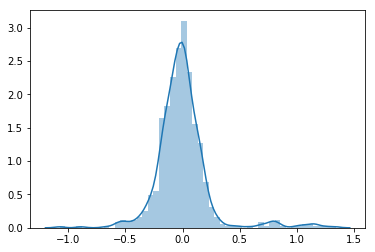

In [61]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)
%matplotlib inline
res = y_train-linreg.predict(X_train_scaled)
sns.distplot(res)

Al utilizar todos los atributos (79) se puede ver que los errores de entrenamiento se distribuyen scon valores cercanos a 0 según lo que se puede observar. Esto tiene sentido porque el modelo es bastante complejo (muchos atributos) y con modelos muy complejos los errores de entrenamiento son bajos, sin embargo, esto puede llevar a un overfitting del modelo por lo que se probará con el conjunto de prueba para contrastastar 

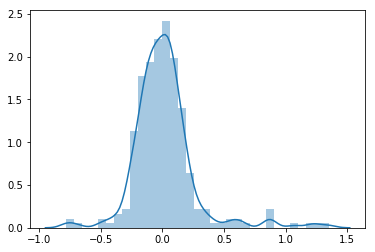

In [62]:
%matplotlib inline
res2 = y_test-linreg.predict(X_test_scaled)
sns.distplot(res2)

En contraste con el conjunto de entrenamiento no se observan mayores diferencias entre los valores de los errores pero si se puede notar que la varianza de los errores en el conjunto de pruebas es mayor ya que la curva es un poco más ancha.

In [63]:
print("Varianza conjunto de entrenamiento: {}".format(np.var(res)))
print("Varianza conjunto de pruebas: {}".format(np.var(res2)))

Varianza conjunto de entrenamiento: 0.057785581797361374
Varianza conjunto de pruebas: 0.0662090927362442


Efectivamente se tiene una mayor varianza (y, por ende, mayor desviación estándar) de los errores, pero ambos valores son muy pequeños por lo que se pueden levantar las siguientes explicaciones que no tienen por qué considerarse todas a la vez:

* Los datos de ambos conjuntos son similares por lo que los valores predichos son los mismos
* Hay variables que opacan a otras en el modelo ya que los pesos difieren en ordenes de magnitud y si estas variables son similares en ambos conjuntos se tendrán resultados similares en ambas pruebas. Esto indicaría que se pueden filtrar algunas variables no necesarias para simplificar el modelo.
* Factor suerte, es decir, los conjuntos se seleccionaron de tal forma que se tuvo bajo error en ambos casos ya que split_test hace una selección aleatoria de conjuntos, para esto se repetirá la prueba con otra semilla a la hora de separar y con un tamaño de prueba un poco mas grande.


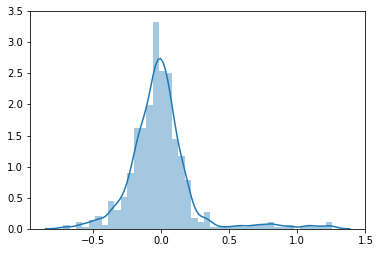

In [64]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.35, random_state=35)
scaler2 = StandardScaler(with_mean=True, with_std=True)
scaler2.fit(X_train2)
X_train_scaled2 = scaler.transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)
linreg2 = LR(fit_intercept=True, n_jobs=1)
linreg2.fit(X_train_scaled2,y_train2)
%matplotlib inline
res3 = y_train2-linreg2.predict(X_train_scaled2)
sns.distplot(res3)

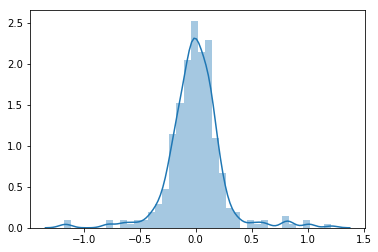

In [65]:
res4 = y_test2-linreg2.predict(X_test_scaled2)
sns.distplot(res4)

Se puede ver que no hay mayor diferencia entre los dos entrenamientos por lo que, en un primer lugar, se podría descartar la tercera opción del factor suerte.

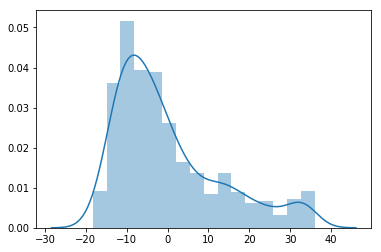

In [66]:
a = X_train_scaled[:,5]
a.shape = (667,1)
a.shape
linreg3 = LR(fit_intercept=True, n_jobs=1)
linreg3.fit(a,y_train)
%matplotlib inline
res5 = y_train-linreg3.predict(a)
sns.distplot(res5)

In [67]:
print("Varianza al utilizar el atributo número 6: {}".format(np.var(res3)))

Varianza al utilizar el atributo número 6: 0.06066247448325157


En este caso se utilizó solamente 1 atributo para predecir el ranking y se pueden notar las discrepancias, los errores son de magnitudes mucho mayores. Esto abre las puertas a pensar de que en el modelo variables como esta están siendo opacadas por otras y pueden ser filtradas.

> f) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? Compare y comente ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

Respondida junto con g) en una sola tabla.

> g) Calcule la información mútua de los distintos predictores (variables) con respecto a la variable *output* o *target*. Comente con lo calculado anteriormente y se le parece razonable.

El desarrollo matemático a continuación es en base al supuesto de que, para un modelo de regresión lineal: 

$$Y = a_{i}\cdot X_{i} + b_{i} + \epsilon_{i} $$ 

$$\epsilon_{i} \sim N(\mu,\sigma)$$

Para construir un Z-score de un atributo $i$ son necesarios dos factores: $\hat{a_{i}}$ y $STD\:(\hat{a_{i}})$ En base a estos factores podemos obtener el Z-score para un atributo $i$ con la siguiente ecuación:

$$Z\,(i)=\frac{\hat{a_{i}}}{STD\,(\hat{a_{i}})}$$

Donde: 

$$ 
\hat{a_{i}} = \frac{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)\cdot \left(Y_{j}-\bar{Y}\right)}{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)^{2}}
$$

$$
STD\,(\hat{a_{i}}) = \frac{\sigma}{\sqrt{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)^{2}}}
$$

Se puede construir un estimador $\hat{\sigma}$ utilizando la siguiente expresión:

$$
\hat{\sigma} = \frac{\sum\left(\hat{Y}-Y\right)^{2}}{N-P} \;\;\;\; donde\,P = d + 1
$$

Así se obtiene el Z-Score:

$$
Z\,(i)= \frac{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)\cdot \left(Y_{j}-\bar{Y}\right)}{\sqrt{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)^{2}}} \cdot \frac{N-P}{\sum\left(\hat{Y}-Y\right)^{2}}
$$

Este puntaje sigue una distribución T-Student con $N-2$ grados de libertad (bajo el supuesto realizado), con la que pueden hacerse constrastes de hipótesis para obtener un conjunto de candidatos. 

El F-Score y el coeficiente de correlación pueden obtenerse al tener en consideración la siguiente ecuación: 

$$
\sum\left(Y-\bar{Y}\right)^{2} = \sum\left(\hat{Y}_{i}-\bar{Y}\right)^{2} + \sum\left(\hat{Y}_{i}-Y\right)^{2}
$$

Este desglose puede entenderse como:

$$
SST = SSR(i) + SSE(i)
$$

* SST: Variabilidad total
* SSR: Variablidad explicada por X
* SSE: Variabilidad no explicada por X

El coeficiente de correlación puede obtenerse mediante: ¿Qué tan bien explica la variabilidad el atributo $i$?

$$
R_{i}^{2} = \frac{SSR(i)}{SST}
$$

El F-Score se obtiene mediante lo siguiente: 

$$
F\,(i) = \frac{\frac{SSR(i)}{1}}{\frac{SSE(i)}{N-2}} = \frac{(N-2)\cdot SSR(i)}{SSE(i)}
$$

Este puntaje sigue una distribución $F_{1,n-2}$ la que se puede contrastar de manera similar al Z-Score gracias al supuesto hecho al inicio de esta sección

Hay que tener en cuenta que estos puntajes implican entrenar el modelo por cada atributo debido a las predicciones.

A continuación se procederá a crear una tabla que contenga: Z-Score, F-Score, $R^{2}$ y el coeficiente (peso) que le otorga el modelo para cada atributo (79)

In [68]:
def z_score(x,y,pred):
    multi = len(x)-2
    nume = sum((x-np.mean(x))*(y-np.mean(y)))
    deno = (sum((x-np.mean(x))**2))**0.5
    error = sum((y-pred)**2)
    try:
        res = (nume*multi)/(deno*error)
    except:
        res = 0
    return res

def r2(predic,y):
    ssr = sum((predic-np.mean(y))**2)
    sst = sum((y - np.mean(y))**2)
    try:
        res = ssr/sst
    except:
        res = 0
    return res

def f_score(predic,y):
    p = len(predic) - 2
    ssr = sum((predic-np.mean(y))**2)
    sse = sum((predic-y)**2)
    try:
        res =(p*ssr)/sse
    except:
        res = 0
    return res

In [69]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.feature_selection import f_regression as fre
tabla = {'atributo' :[], 'Z-Score':[], 'F-Score':[],'F-Score-SKLEARN':[],'F-Score-SKLEARN-Pvalue':[] ,'R²':[], "Coef":[],"N":[],"MI":[]} 
y_true = nuevo_df['total_score'].values
y_true = y_true.astype('float32')
y_true.shape = (y_true.shape[0],1) #Por hay que agregarle la dimension 1 para que sea columna como la teoria 
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1)
names = list(X)
scaler3 = StandardScaler(with_mean=True, with_std=True)
linreg4 = LR(fit_intercept=True, n_jobs=1)
for atributo in names:
    tabla['atributo'].append(atributo)
    x_values = np.array(X[atributo])
    x_values = x_values.astype('float32')
    x_values.shape = (x_values.shape[0],1) #pasar a vector columna y sea bonito 
    #No es necesario hacer train_split porque usaremos el conjunto de datos entero para el modelo
    scaler3.fit(x_values)
    x_values_scaled = scaler3.transform(x_values) #Escalado porque el coef es sensible y queremos compararlos
    linreg4.fit(x_values_scaled,y_true)
    predicciones = linreg4.predict(x_values_scaled)
    minfo_predictor = mutual_info_regression(x_values_scaled,y_true)
    tabla['Z-Score'].append(z_score(x_values_scaled,y_true,predicciones)[0])
    tabla['F-Score'].append(f_score(predicciones,y_true)[0])
    tabla['F-Score-SKLEARN'].append(fre(x_values_scaled,y_true)[0][0])
    tabla['F-Score-SKLEARN-Pvalue'].append(fre(x_values_scaled,y_true)[1][0])
    tabla['R²'].append(r2(predicciones,y_true)[0])
    tabla['Coef'].append(linreg4.coef_[0][0])
    tabla['N'].append(len(x_values))
    tabla['MI'].append(minfo_predictor[0])

In [70]:
import pandas as pd
scores = pd.DataFrame.from_dict(tabla)
scores

,atributo,Z-Score,F-Score,F-Score-SKLEARN,F-Score-SKLEARN-Pvalue,R²,Coef,N,MI
0,teaching,12.163524,4299.646973,4299.647944,0.000000e+00,0.818723,11.444567,954,0.885847
1,international,0.277196,12.162777,12.162778,5.098203e-04,0.012615,1.420600,954,0.074217
2,research,12.044685,4253.452148,4253.454773,0.000000e+00,0.817114,11.433317,954,0.902012
3,citations,1.979989,432.239197,432.239045,1.900905e-79,0.312257,7.067846,954,0.313866
4,income,0.614959,57.191124,57.191183,9.297855e-14,0.056670,3.010983,954,0.143038
5,num_students,0.027210,0.118676,0.118676,7.305510e-01,0.000125,0.141210,954,0.275903
6,student_staff_ratio,-0.657508,64.884300,64.884319,2.363536e-15,0.063807,-3.194955,954,0.288537
7,international_students,0.615232,57.239330,57.239362,9.085472e-14,0.056715,3.012180,954,0.337882
8,female_male_ratio,-0.375835,22.130232,22.130206,2.924540e-06,0.022718,-1.906404,954,0.300915
9,year,0.149912,3.589308,3.589305,5.845538e-02,0.003756,0.775176,954,0.234735


Lo primero que puede llamar la atención son los valores nulos en algunos puntajes. Estos se pueden interpretar como puntajes muy bajos que no son calculables por la máquina ya que aquellos atributos son una columnas de valores binarios (0,1) indicando si pertenece o no al país como se pueden tener muy pocas universidades de un país los valores alcanzados son muy bajos ya que si se cuenta con solo un $1$ en una columna $X-\bar{X} = 0$.

Para un test de hipótesis con un nivel de significación de un $5\%$ se puede decir que un Z-Score de $\sim 1.64 (\sim 0.9495)$ en adelante es suficiente para decir que el coeficiente de dicho atributo no es cero. En base a esto podemos filtrar los valores que interesan de la siguiente manera:   

In [71]:
z_score_filtro = scores[scores['Z-Score']>=1.64]
z_score_filtro

,atributo,Z-Score,F-Score,F-Score-SKLEARN,F-Score-SKLEARN-Pvalue,R²,Coef,N,MI
0,teaching,12.163524,4299.646973,4299.647944,0.000000e+00,0.818723,11.444567,954,0.885847
2,research,12.044685,4253.452148,4253.454773,0.000000e+00,0.817114,11.433317,954,0.902012
3,citations,1.979989,432.239197,432.239045,1.900905e-79,0.312257,7.067846,954,0.313866


Según lo dicho anteriormente los atributos que pasarían el filtro con significancia de $5\%$ según Z-Score son *teaching, research y citations*

Si se ordena por F-Score

In [72]:
scores.sort_values(by='F-Score',ascending=False).head()

,atributo,Z-Score,F-Score,F-Score-SKLEARN,F-Score-SKLEARN-Pvalue,R²,Coef,N,MI
0,teaching,12.163524,4299.646973,4299.647944,0.000000e+00,0.818723,11.444567,954,0.885847
2,research,12.044685,4253.452148,4253.454773,0.000000e+00,0.817114,11.433317,954,0.902012
3,citations,1.979989,432.239197,432.239045,1.900905e-79,0.312257,7.067846,954,0.313866
76,country_United States of America,0.794610,92.278564,92.278059,6.448946e-21,0.088366,3.759860,954,0.244342
6,student_staff_ratio,-0.657508,64.884300,64.884319,2.363536e-15,0.063807,-3.194955,954,0.288537


Para un contraste de hipótesis utilizando el F-Score se dirá que un p-valor correspondiente a un 1% es lo suficientemente bajo para decir que el coeficiente que acompaña a esa variable no es cero.

In [73]:
scores[scores['F-Score-SKLEARN-Pvalue']<0.01]

,atributo,Z-Score,F-Score,F-Score-SKLEARN,F-Score-SKLEARN-Pvalue,R²,Coef,N,MI
0,teaching,12.163524,4299.646973,4299.647944,0.000000e+00,0.818723,11.444567,954,0.885847
1,international,0.277196,12.162777,12.162778,5.098203e-04,0.012615,1.420600,954,0.074217
2,research,12.044685,4253.452148,4253.454773,0.000000e+00,0.817114,11.433317,954,0.902012
3,citations,1.979989,432.239197,432.239045,1.900905e-79,0.312257,7.067846,954,0.313866
4,income,0.614959,57.191124,57.191183,9.297855e-14,0.056670,3.010983,954,0.143038
6,student_staff_ratio,-0.657508,64.884300,64.884319,2.363536e-15,0.063807,-3.194955,954,0.288537
7,international_students,0.615232,57.239330,57.239362,9.085472e-14,0.056715,3.012180,954,0.337882
8,female_male_ratio,-0.375835,22.130232,22.130206,2.924540e-06,0.022718,-1.906404,954,0.300915
22,country_Denmark,-0.212374,7.176490,7.176485,7.513894e-03,0.007482,-1.094051,954,0.134566
27,country_Germany,-0.228732,8.314798,8.314817,4.020856e-03,0.008658,-1.176929,954,0.112303


En base a F-Score se tienen más atributos que pasan el filtrado aunque de ellos se puede ver que la información mutua y el coeficiente de correlación son bajos en comparación a los campos *Teaching* y *Research* 

Si ordenamos por coeficiente R²

In [74]:
scores.sort_values(by='R²',ascending=False).head()

,atributo,Z-Score,F-Score,F-Score-SKLEARN,F-Score-SKLEARN-Pvalue,R²,Coef,N,MI
0,teaching,12.163524,4299.646973,4299.647944,0.000000e+00,0.818723,11.444567,954,0.885847
2,research,12.044685,4253.452148,4253.454773,0.000000e+00,0.817114,11.433317,954,0.902012
3,citations,1.979989,432.239197,432.239045,1.900905e-79,0.312257,7.067846,954,0.313866
76,country_United States of America,0.794610,92.278564,92.278059,6.448946e-21,0.088366,3.759860,954,0.244342
6,student_staff_ratio,-0.657508,64.884300,64.884319,2.363536e-15,0.063807,-3.194955,954,0.288537


Si ordenamos por Información Mutua

In [75]:
scores.sort_values(by='MI',ascending=False)[:20]

,atributo,Z-Score,F-Score,F-Score-SKLEARN,F-Score-SKLEARN-Pvalue,R²,Coef,N,MI
2,research,12.044685,4253.452148,4253.454773,0.000000e+00,0.817114,11.433317,954,0.902012
0,teaching,12.163524,4299.646973,4299.647944,0.000000e+00,0.818723,11.444567,954,0.885847
7,international_students,0.615232,57.239330,57.239362,9.085472e-14,0.056715,3.012180,954,0.337882
3,citations,1.979989,432.239197,432.239045,1.900905e-79,0.312257,7.067846,954,0.313866
8,female_male_ratio,-0.375835,22.130232,22.130206,2.924540e-06,0.022718,-1.906404,954,0.300915
78,male,0.295041,13.756482,13.756504,2.201362e-04,0.014244,1.509562,954,0.293052
6,student_staff_ratio,-0.657508,64.884300,64.884319,2.363536e-15,0.063807,-3.194955,954,0.288537
77,female,-0.295041,13.756482,13.756504,2.201362e-04,0.014244,-1.509562,954,0.283009
5,num_students,0.027210,0.118676,0.118676,7.305510e-01,0.000125,0.141210,954,0.275903
76,country_United States of America,0.794610,92.278564,92.278059,6.448946e-21,0.088366,3.759860,954,0.244342


En este caso se puede ver que el orden según información Mutua difiere de los otros rankings esto podría ser causa de que la información mutua es capaz de detectar relaciones no lineales entre variables, para ello se compararán los gráficos de los cuatro primeros lugares según este orden.

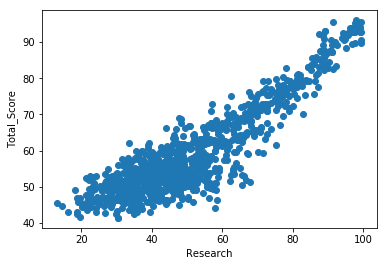

In [76]:
import matplotlib.pyplot as plt
plt.scatter(X['research'],y_true)
plt.ylabel('Total_Score')
plt.xlabel('Research')
plt.show()

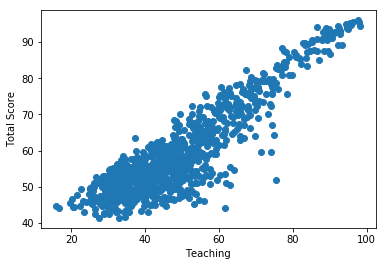

In [77]:
plt.scatter(X['teaching'],y_true)
plt.ylabel('Total Score')
plt.xlabel('Teaching')
plt.show()

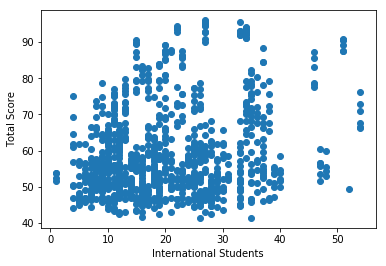

In [78]:
plt.scatter(X['international_students'],y_true)
plt.ylabel('Total Score')
plt.xlabel('International Students')
plt.show()

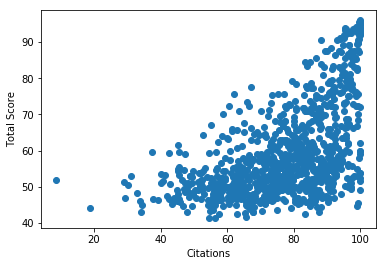

In [79]:
plt.scatter(X['citations'],y_true)
plt.ylabel('Total Score')
plt.xlabel('Citations')
plt.show()

De los gráficos anteriores se puede decir que los campos *International Students* y *Citations* No poseen una relación lineal con el puntaje y esto puede explicar que sus puntajes en el modelo de regresión lineal no coincidan con el orden de los puntajes obtenidos por la información mutua. Respecto a *Teaching* y *Research* el comportamiento es bastante similar por lo que puede decirse que *Research* puede tener una relación *menos lineal* con el puntaje total que el atributo *Teaching* lo que explicaría la discrepancia entre los órdenes.

> h)  Construya una función que implemente *Forward Step-wise Selection* (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.

El criterio que se utilizará para selecciona un atributo será el error MAE

$$
MAE = \frac{\sum_{i}^{N}\left( |\hat{Y}-Y|\right)}{N}
$$



In [80]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
import numpy as np

y_true = nuevo_df['total_score'].values
y_true = y_true.astype('float32')
y_true.shape = (y_true.shape[0],1) #Por hay que agregarle la dimension 1 para que sea columna como la teoria 
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1)
names = list(X)

def mae(predic,y):
    n = len(y)
    total = sum(abs(predic-y))
    return total/n

def mse(predic,y):
    #mse se comporta igual que mae pero empieza en valores mas altos
    n = len(y)
    total = sum((predic-y)**2)
    return total/n

def fss(data, y, names,k=1000): #k es de cuantos parámetros quiero 
    #donde guardaremos las variables
    lista_seleccionados = []
    mae_train = []
    mae_test = []
    modelo = LR(fit_intercept=True, n_jobs=1)
    scaler = StandardScaler(with_mean=True, with_std=True)
    freno = len(names)
    cont = -1
    while (len(names)!=0 and len(lista_seleccionados)<k):
        cont +=1
        mae_test_dummy = 1000000 #mae muy alto para que cualquiera lo reemplace 
        actual = lista_seleccionados
        flag = 0 #indica si hubo un cambio o no de mae_test_dummy
        for atributo in names:
            actual.append(atributo) #seleccionados actuales + el nuevo elemento
            x_values = np.array(data[actual]) #seleccionamos las columnas que nos interesan
            x_values = x_values.astype('float32')
            X_train, X_test, y_train, y_test = train_test_split(x_values, y, test_size=0.3, random_state=42)
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            modelo.fit(X_train_scaled,y_train)
            training = modelo.predict(X_train_scaled)
            test = modelo.predict(X_test_scaled)
            e_train_act = mae(training,y_train)[0]
            e_test_act = mae(test,y_test)[0]
            if e_test_act < mae_test_dummy:
                mae_test_dummy = e_test_act
                mae_train_dummy = e_train_act
                candidato = atributo
                flag = 1
            actual.pop() #sacamos el atributo 
        if flag == 1:
            lista_seleccionados.append(candidato)
            mae_train.append(mae_train_dummy)
            mae_test.append(mae_test_dummy)
        if cont > freno: #prevención de loop infinito 
            break
    return lista_seleccionados, mae_train, mae_test

seleccionados, maes_train, maes_test = fss(X,y_true,names)


Una vez ejecutado el *Forward Stepwise Selection* se presenta una fracción de la tabla donde las filas están ordenadas por el orden en que fueron agregadas utilizando el algoritmo FSS.

In [81]:
tabla2 = {'Atributos':seleccionados,'E_Train':maes_train,'E_Test':maes_test}
fss_table = pd.DataFrame.from_dict(tabla2)
fss_table.iloc[:10] #se puede variar si se quieren ver mas variables, hacerlo hasta 78 max

,Atributos,E_Train,E_Test
0,teaching,4.232204,4.201831
1,citations,2.613475,2.669296
2,research,1.322225,1.247941
3,international,0.484305,0.466516
4,income,0.149759,0.161089
5,country_Egypt,0.143197,0.157051
6,country_United States of America,0.143751,0.154291
7,country_Germany,0.143500,0.152282
8,country_Spain,0.143197,0.151497
9,country_United Kingdom,0.143207,0.151068


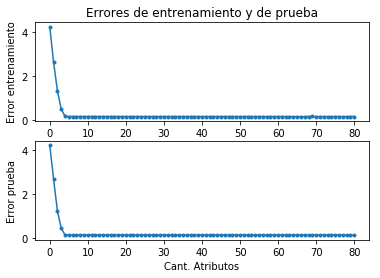

In [82]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(maes_train, '.-')
plt.title('Errores de entrenamiento y de prueba')
plt.ylabel('Error entrenamiento')

plt.subplot(2, 1, 2)
plt.plot(maes_test, '.-')
plt.xlabel('Cant. Atributos')
plt.ylabel('Error prueba')

plt.show()

Se puede observar que el error disminuye significativamente a medida que agregamos atributos estabilizándose al tener 5+ atributos en el modelo. En base a esto podemos decir que el trabajo realizado con anterioridad se hizo en base a un modelo muy complejo que podía simplificarse a 5 de 79 atributos. Además de que se tiene relación al orden de los atributos por los distintos puntajes, nuevamente se ve que *Teaching* y *Research* son de los primeros en agregarse.

> i) Ajuste un modelo lineal utilizando “*Ridge Regression*”, es decir, regularizando con la norma $l_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^0, 10^6$], variando si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Deje un gráfico sólo para analizar los coeficientes de los países. Describa lo que observa.

El método de Ridge Regression penaliza al modelo por elegir muchos parámetros gracias a un factor $\lambda$, en el caso del modelo que se está trabajando (Regresión lineal), Ridge Regression intenta minimizar la siguiente función objetivo:

$$
Arg\, Min\; \sum\left(Y-\hat{Y}\right)^{2} + \frac{\lambda}{2}\cdot||w||^{2}
$$

Donde $w$ es el vector de coeficientes asignados por el modelo, como se quiere minimizar el error se suma este factor extra para penalizar el hecho de elegir muchos coeficientes, o coeficientes muy altos. El resultado depende del parámetro de regularización $\lambda$ elegido ya que este dicta que tan importante es penalizar al modelo.

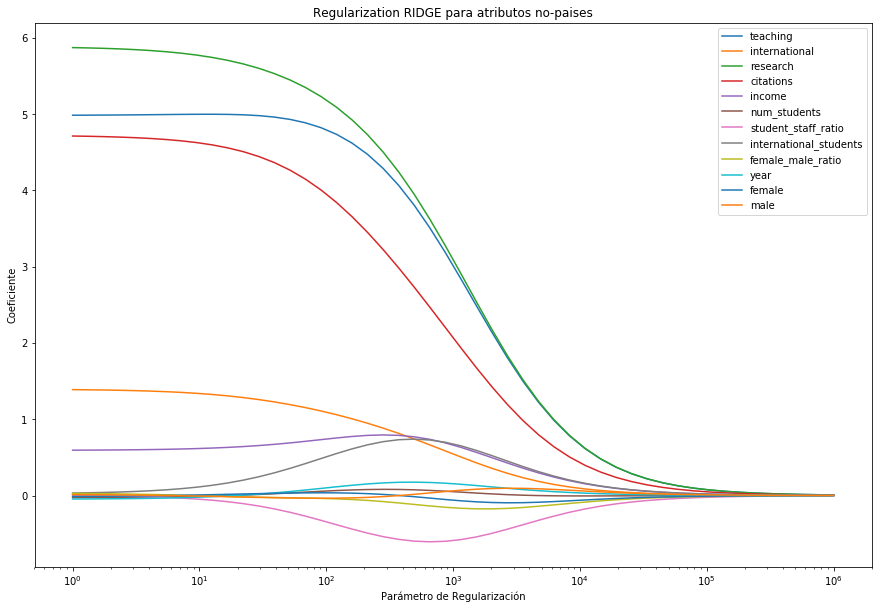

In [83]:
# Ajustar tamaño del gráfico
fig_size = plt.rcParams["figure.figsize"]
 
# Set width and height
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

from sklearn.linear_model import Ridge
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization RIDGE para atributos no-paises')
plt.ylabel('Coeficiente')
plt.xlabel('Parámetro de Regularización')
plt.legend()
plt.show()


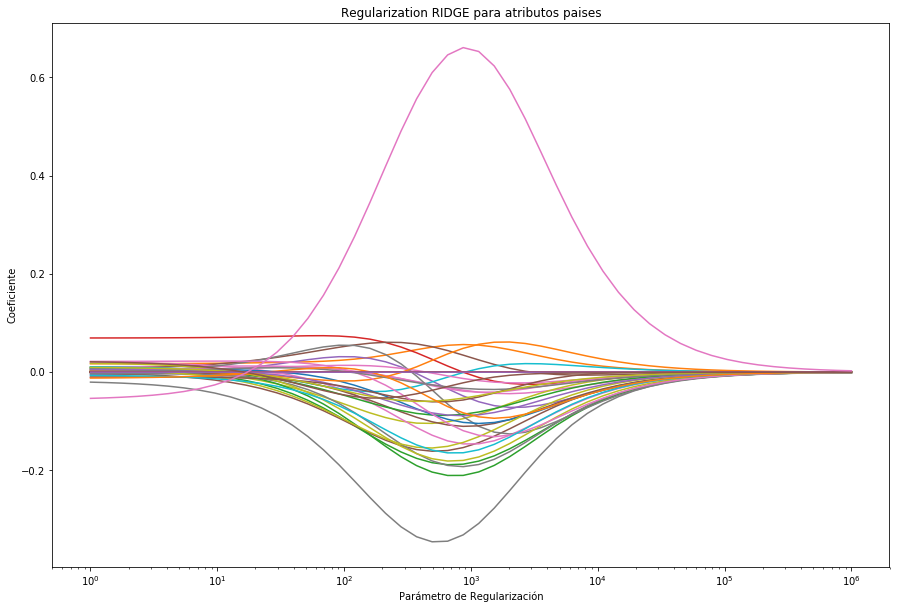

In [84]:
#[0] -> X [1]->Y
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" in label:
        plt.plot(alphas_, y_arr)
ax.set_xscale('log')
plt.ylabel('Coeficiente')
plt.xlabel('Parámetro de Regularización')
plt.title('Regularization RIDGE para atributos paises')
plt.show()


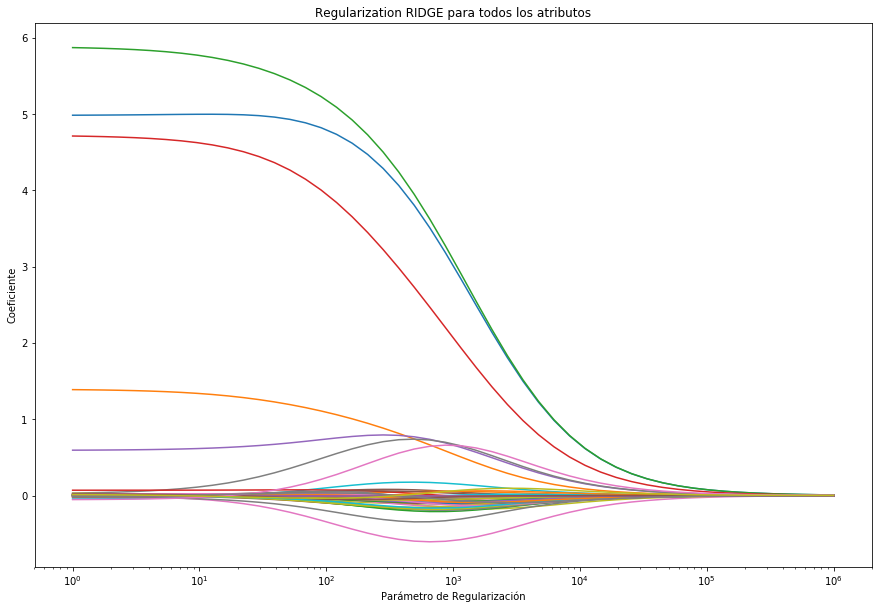

In [85]:
#[0] -> X [1]->Y
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
        plt.plot(alphas_, y_arr)
ax.set_xscale('log')
plt.title('Regularization RIDGE para todos los atributos')
plt.ylabel('Coeficiente')
plt.xlabel('Parámetro de Regularización')
plt.show()


Como es de esperar, valores muy altos de $\lambda$ penalizan al modelo haciendo tender todos los coeficientes (tanto para los paises como para no-paises) a cero debido a que el modelo es castigado severamente también se puede ver que los coeficientes de los países oscilan en valores intermedios de $\lambda$ (entiéndase valor intermedio como un valor entre los dos extremos del intervalo) y después tienden a cero en valores altos de $\lambda$. Sin embargo, es muy importante mencionar que para cuando los valores de los coeficientes de los países son cero ($\lambda \sim 10^{5}$) los otros coeficientes también son cero ($\lambda \sim 10^{4}$) por lo que se tendría un modelo que posee solamente un coeficiente de posición al final. 

> j) Ajuste un modelo lineal utilizando el método “*Lasso*”, es decir, regularizando con la norma $l_1$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^{-2},10^3$]. Para obtener el código, modifique el ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

El método *Lasso* funciona de manera similar el método *Ridge* ambos penalizan los coeficientes de los atributos, sin embargo, el método *Lasso* lo hace bajo la siguiente ecuación:

$$
Arg\, Min\; \left\{ \frac{1}{2}\cdot\sum\left(Y-\hat{Y}\right)^{2} + \lambda\cdot w \right\}
$$


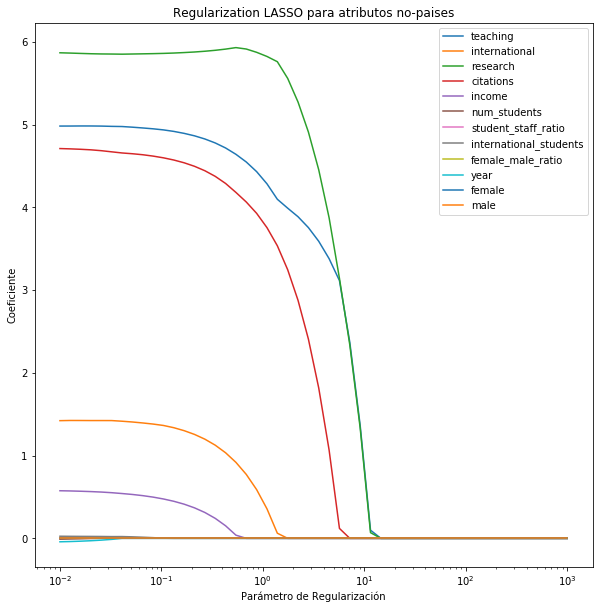

In [86]:
#[0] -> X [1]->Y
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

from sklearn.linear_model import Lasso
model = Lasso(fit_intercept=True)
alphas_ = np.logspace(-2,3,base=10)
country_alphas_ = np.logspace(-5,0,base=10)
coefs = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization LASSO para atributos no-paises')
plt.ylabel('Coeficiente')
plt.xlabel('Parámetro de Regularización')
plt.legend()
plt.show()

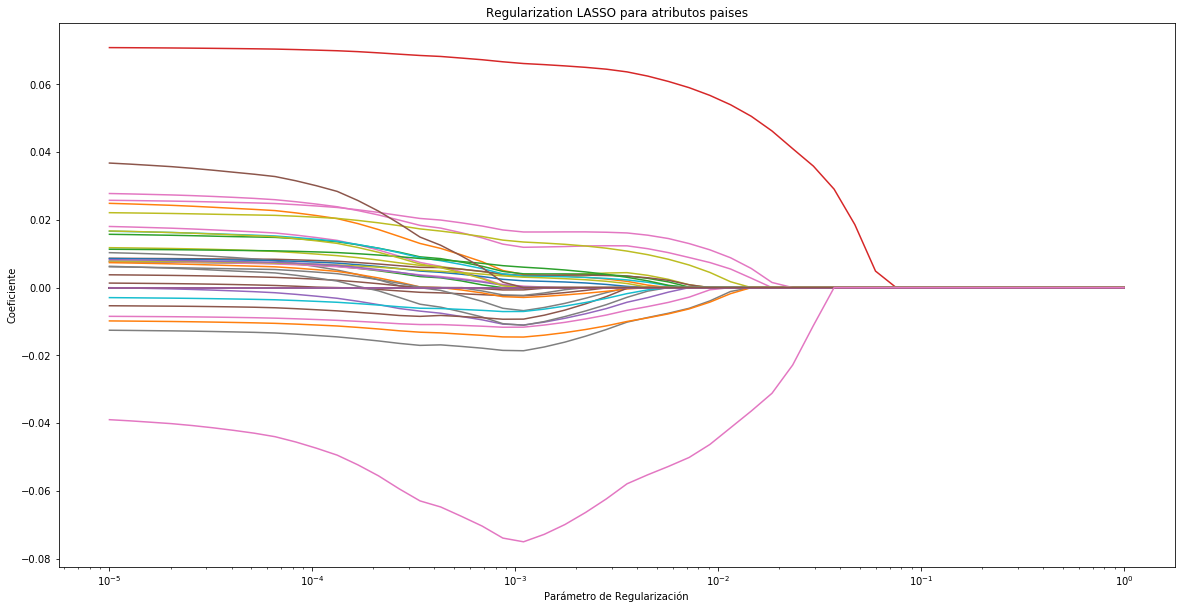

In [87]:
#[0] -> X [1]->Y
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
country_alphas_ = np.logspace(-5,0,base=10)
coefs = []
for a in country_alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" in label:
        plt.plot(country_alphas_, y_arr)
ax.set_xscale('log')
plt.title('Regularization LASSO para atributos paises')
plt.ylabel('Coeficiente')
plt.xlabel('Parámetro de Regularización')
plt.show()

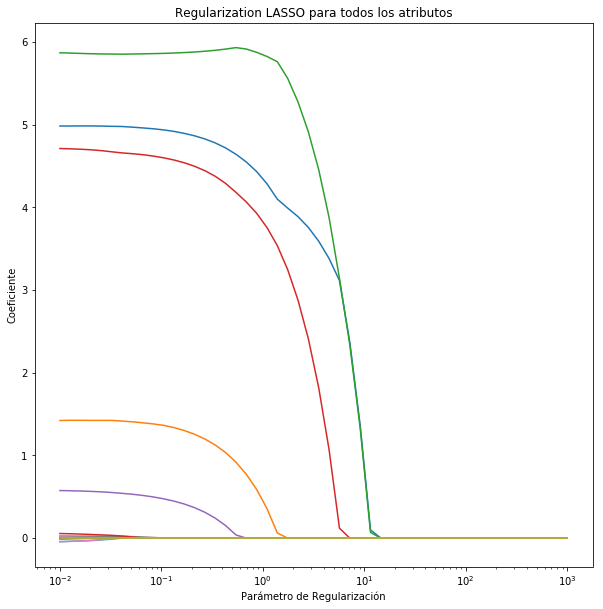

In [88]:
#[0] -> X [1]->Y
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

from sklearn.linear_model import Lasso
model = Lasso(fit_intercept=True)
alphas_ = np.logspace(-2,3,base=10)
country_alphas_ = np.logspace(-5,0,base=10)
coefs = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
        plt.plot(alphas_, y_arr)
ax.set_xscale('log')
plt.title('Regularization LASSO para todos los atributos')
plt.ylabel('Coeficiente')
plt.xlabel('Parámetro de Regularización')
plt.show()

La forma de penalización del método *Lasso* hace que los atributos tengan el valor 0 en base al parámetro de regularización utilizado, esto es una ventaja sobre el método *Ridge* porque permite seleccionar atributos, los que tienen un coeficiente distinto de cero. No así como el método *Ridge* donde los coeficientes oscilan en torno al cero en vez de quedarse fijos en ese valor. Tanto en *Ridge* como en *Lasso* se puede ver como los atributos: *teaching*, *research* y *citations* son los últimos en anularse lo que coincide con todo lo mencionado anteriormente.

>k) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un gráfico que muestre el error de entrenamiento y el de pruebas como función del parámetro de regularización. Discuta lo que observa. 

El método regularizador que se eligió es el método *Lasso* ya que permite la selección de atributos en contraste con el método *Ridge*.

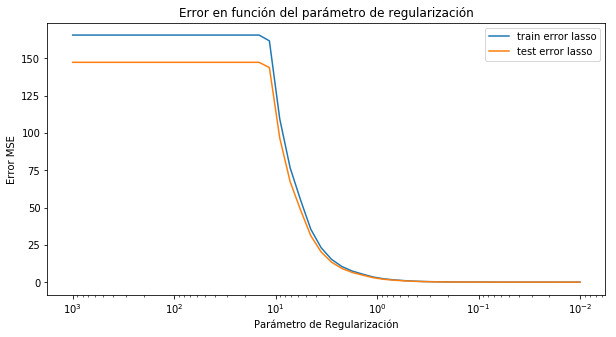

In [89]:
#[0] -> X [1]->Y
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

alphas_ = np.logspace(-2,3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylabel('Error MSE')
plt.xlabel('Parámetro de Regularización')
plt.title('Error en función del parámetro de regularización')
plt.show()

Del gráfico se puede ver que el error decrece junto al valor del parámetro $\lambda$ estabilizándose alrededor del orden de magnitud $-1$. Esto tiene sentido con lo observado en los dos gráficos anteriores ya que alrededor de $10^{1}$ todos los coeficientes son 0 por lo que el modelo solamente deja un coeficiente de posición que no es penalizado por el método *Lasso* lo que hace que el error sea constante cuando todos los coeficientes son 0 y corresponde a la diferencia entre el output y el coeficiente de posición. También se observa que el error se encuentra en su valor mínimo entre los ordenes de magnitud $[-2,0]$ y si se compara con los gráficos anteriores se puede ver que en este intervalo los atributos que predominan son los que se identificaron con anterioridad en las tablas de los Scores (teaching,research y citations).

> l) Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de la técnica validación cruzada con un número de folds igual a $K= 5$ y $K = 10$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Mida el error real del modelo (ésto es sobre el conjunto de pruebas). Debido a la escala del error puede utilizar auxiliarmente *MAE* como métrica de desempeño. Compare y concluya.

Se determinará el parámetro $\lambda$ para el modelo *Lasso* entre los rango $[10^{-2},10^{0}]$ utilizando cross validation y la función *cross_val_score* 

In [90]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score as cvs
las = Lasso(fit_intercept=True)
espacio = np.logspace(-2,0,base=10)
las_scores = []
for valor in espacio:
    las.set_params(alpha=valor)
    puntaje = cvs(las,X,Y,cv=10,scoring='neg_mean_absolute_error') #K = 10
    las_scores.append((-1*puntaje).mean()) #cvs intenta maximizar la negativa del error 

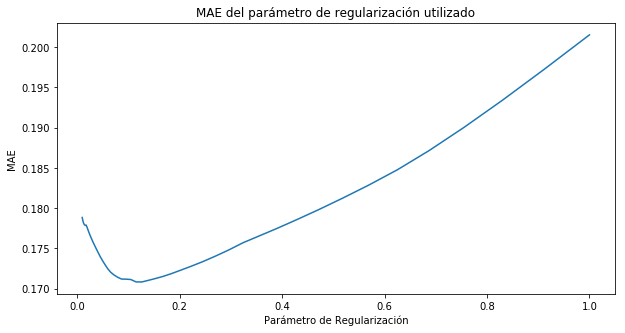

In [91]:
plt.plot(espacio,las_scores)
plt.ylabel('MAE')
plt.xlabel('Parámetro de Regularización')
plt.title('MAE del parámetro de regularización utilizado')
plt.show()

In [92]:
tabla3 = {'lambda':espacio,'MAE':las_scores}
lasso_puntajes = pd.DataFrame.from_dict(tabla3)
fila_min = lasso_puntajes[lasso_puntajes['MAE']==min(lasso_puntajes['MAE'])]
fila_min

,lambda,MAE
27,0.126486,0.170821


In [93]:
lambda_min = float(fila_min['lambda'])
lambda_min

0.12648552168552957

In [94]:
espacio = np.logspace(-2,0,base=10)
las2_scores = []
for valor in espacio:
    las.set_params(alpha=valor)
    puntaje = cvs(las,X,Y,cv=5,scoring='neg_mean_absolute_error') #K = 5
    las2_scores.append((-1*puntaje).mean())

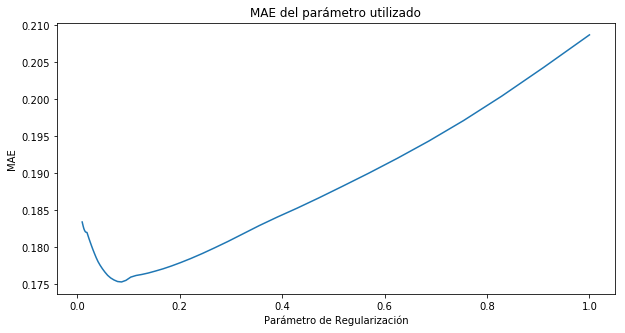

In [95]:
plt.plot(espacio,las2_scores)
plt.ylabel('MAE')
plt.xlabel('Parámetro de Regularización')
plt.title('MAE del parámetro utilizado')
plt.show()

In [96]:
tabla4 = {'lambda':espacio,'MAE':las2_scores}
lasso_puntajes2 = pd.DataFrame.from_dict(tabla4)
fila_min2 = lasso_puntajes2[lasso_puntajes2['MAE']==min(lasso_puntajes2['MAE'])]
fila_min2

,lambda,MAE
23,0.086851,0.175303


In [97]:
lambda_min2 = float(fila_min2['lambda'])
lambda_min2

0.08685113737513525

Al utilizar $K = 5$ conjuntos se tiene un MAE mayor que utilizando $K = 10$ conjuntos, por lo que se optará por elegir el $\lambda$ mínimo al utilizar $10$ conjuntos en cross-validation. Se tiene que el valor de $\lambda$ corresponde a $\lambda \sim 0.126$

> m) Con el modelo que se piense que es el mejor, en base a todo lo experimentado. Realice el *ranking* de las universidades del que no se tienen etiquetas (*unlabeled data* o *target data*) a través de predecir los datos que se dejaron como *pruebas* y ordenar su score en el *dataframe*.

El modelo que se utilizará será el modelo *Lasso* con el $\lambda$ que minimizaba el MAE utilizando la técnica cross-validation con $10$ conjuntos de datos

In [98]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)

X_test = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
scaler.fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

lambda_bueno = lambda_min
model = las
model.set_params(alpha=lambda_bueno)
model.fit(X_scaled,Y)

df_test["total_score"] = model.predict(X_test_scaled) #predict score
#armar un raking
univ_chilenas = df_test[df_test["country_Chile"]==1]
rannking_univ_ch = univ_chilenas.sort_values(by="total_score",ascending=False)
ranking = 1
for index,row in rannking_univ_ch.iterrows():
    print("%d - Institucion: %s en el año %d con puntaje" %(ranking,row["university_name"],row["year"]))
    ranking+=1

1 - Institucion: Federico Santa María Technical University en el año 2015 con puntaje
2 - Institucion: Federico Santa María Technical University en el año 2016 con puntaje
3 - Institucion: Austral University of Chile en el año 2016 con puntaje
4 - Institucion: University of Santiago, Chile (USACH) en el año 2016 con puntaje
5 - Institucion: Pontifical Catholic University of Valparaíso en el año 2016 con puntaje


Como se puede ver, nuestra universidad ocupa el primer y segundo lugar en el ranking, pero es debido a que pertenecía a otro año la posición número uno. De este ranking podemos decir que nuestro puntaje bajó del año 2015 al 2016 y que en el 2016 la UTFSM fue la universidad de Chile con el mejor puntaje.

## 2. Análisis de audios como datos brutos

Distintos tipos de datos han sido tratados en el área de Machine Learning, donde el análisis de estos y
el manejo para poder dejarlos en una representación que se pueda entregar como entrada al algoritmo es
crucial. El manejo sobre los datos brutos se denomina pre-procesamiento y existen distintos dependiento del
tipo de datos y los distintos dominios de problemas, tales como imágenes, audios, texto.  
En esta actividad se trabajará con datos de audios los cuales son directamente extraı́dos desde datos fuentes
*.wav*, lo que corresponde a una señal de sonido en diferentes tiempos.

<img src="https://cdn.shopify.com/s/files/1/0977/4240/products/il_fullxfull.1054777221_nym4.jpg?v=1527718941" width="40%" />



El *dataset* se denomina **Heartbeat Sounds**[[3]](#refs) y es presentado en la plataforma Kaggle a través del siguiente  __[link](https://www.kaggle.com/kinguistics/heartbeat-sounds)__. Este dataset consta de grabaciones de sonidos de latidos cardı́acos normales y anormales, con distintas categorı́as para los latidos anormales. Para la tarea se trabajará con el *dataset A* presente en la data, el cual corresponde a datos generados desde la vı́a pública mediante la aplicación de Iphone iStethoscope Pro. El objetivo será el de clasificar cada sonido como latido cardı́aco normal o una de las las subcategorı́as de anormal (*Murmur, Extra Heart Sound, Artifact*), por lo que se trata de un problema de clasificación múltiple con 4 clases. Las distintas clasificaciones para los sonidos son explicadas en el sitio de Kaggle.

In [29]:
#Para trabajar con los archivos WAV
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

> a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.

In [30]:
import pandas as pd
import numpy as np
heartbeats_df = pd.read_csv('set_a.csv')
print("Tipos de latidos: {0}".format(heartbeats_df["label"].unique()))
heartbeats_df.head()

Tipos de latidos: ['artifact' 'extrahls' 'murmur' 'normal' nan]


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


En el dataset se pueden distinguir cuatro columnas, de las cuales dos son de interés, el nombre del archivo contenido en la columna *fname* y el *label* que corresponde al tipo del latido. La columna *sublabel* no es de interés puesto que es una columna para utilizar en el segundo set de datos "set_b" con el cual no se trabajará en esta sección, era un indicador de ruido de fondo en el .wav del latido; la columna dataset tampoco es útil porque solamente indica en qué dataset estamso trabajando y todos los registros de esta columna son "a" lo que no aporta ninguna utilidad.

In [31]:
heartbeats_df = heartbeats_df[["fname","label"]]
heartbeats_df.head()

,fname,label
0,set_a/artifact__201012172012.wav,artifact
1,set_a/artifact__201105040918.wav,artifact
2,set_a/artifact__201105041959.wav,artifact
3,set_a/artifact__201105051017.wav,artifact
4,set_a/artifact__201105060108.wav,artifact


In [32]:
print("Valores por cada etiqueta:")
heartbeats_df.label.value_counts(dropna=False)

Valores por cada etiqueta:


NaN         52
artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

In [33]:
pd.isnull(heartbeats_df["fname"]).unique()

array([False])

En el conjunto de datos se tienen 52 etiquetas con valores NA, sin embargo, mas adelante se tendrá en cuenta la opinión de un doctor experto que clasifica cada dato con su etiqueta correspondiente.

> b) Lea los archivos *.wav* y transformelos en secuencias de tiempo. Realice un *padding* de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.

In [34]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
#cambia los nombres de archivos con etiqueta NA a unlabelled
new_heartbeatdf =pd.DataFrame({'file_name' : heartbeats_df['fname'].apply(clean_filename,string='Aunlabelledtest')})

#crea la serie de tiempo
new_heartbeatdf['time_series'] = new_heartbeatdf['file_name'].apply(load_wav_file, path="./set_a/")

#crea la columna del largo de las series
new_heartbeatdf['len_series'] = new_heartbeatdf['time_series'].apply(len)

#Hace el padding en las series de tiempo para que todas queden con el mismo largo
new_heartbeatdf['time_series']=new_heartbeatdf['time_series'].apply(padd_zeros,length=max(new_heartbeatdf['len_series']))
new_heartbeatdf['len_series'] = new_heartbeatdf['time_series'].apply(len)
new_heartbeatdf.head()

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


La gracia de hacer padding de ceros es que, al tener series temporales, no todas serán de la misma longitud lo que puede afectar al momento de trabajar con estas, entonces a las series de menor largo se les agregan ceros al final hasta que sean del mismo largo que la más larga para tener todos los registros con el mismo largo, el cero es para indicar que no hay atributo *i* en ese instante 

> c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [[4]](#refs), el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase. Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?

Respondida en conjunto con la letra d)

> d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.

Según la opinión del médico experto los latidos del tipo "*extrahls*" del dataset son sonido tenues con una duraciones muy cortas y que según su audición ese ruido es generado por el instrumento utilizado para realizar las grabaciones de los latidos. Además de que muchos latidos catalogados como *normales* compartían sonidos muy similares a los de la categoría previamente mencionada por lo que era bueno combinar la categoría *extrahls* con los latidos normales porque además estos latidos no caían en la categoría de los anormales. 

El hecho de tener datos mal etiquetados puede tener graves consecuencias a la hora de utilizar un modelo para predecir nuevos casos ya que en muchos ámbitos de la vida el peso de cometer un tipo de error es distinto a cometer el otro tipo, por ejemplo, es mucho peor decir que un paciente no tiene cáncer y que resulte en que si tiene cáncer a decir que tiene cáncer y luego de realizar el examen resulte que no lo tiene. 

En este caso el hecho de catalogar los latidos *extrahls* como anómalos hubiera generado que todo ese grupo de pacientes quedara catalogado con un estado cardíaco anómalo y hubiera derivado en la preocupación de los pacientes, siendo que esta categoría es un latido normal con algo de ruido de fondo debido al instrumento utilizado.

Si por un dato nos referimos a un registro entonces este podría analizarse como outlier por la persona y ser asignado correctamente si es que la persona es experta en el dominio del dato.

In [35]:
#Labels verdaderos según el doctor
new_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [36]:
labels = ['artifact','normal/extrahls', 'murmur']
new_heartbeatdf['target'] = [labels[i] for i in new_labels]
new_heartbeatdf.head()

,file_name,time_series,len_series,target
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900,artifact
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900,artifact
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900,artifact
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,artifact
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900,artifact


Después de asignar la etiqueta correcta a cada archivo se pasará a una variable categórica que pueda ser entendida por el modelo como estamos hablando de etiquetas es necesario que cada etiqueta sea representada con un número distinto para tener buenos resultados.

In [37]:
new_heartbeatdf["target_num"] = new_heartbeatdf["target"].astype('category')
cat_columns = new_heartbeatdf.select_dtypes(['category']).columns
new_heartbeatdf[cat_columns] = new_heartbeatdf[cat_columns].apply(lambda x: x.cat.codes)
new_heartbeatdf

,file_name,time_series,len_series,target,target_num
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900,artifact,0
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900,artifact,0
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900,artifact,0
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,artifact,0
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900,artifact,0
5,artifact__201105061143.wav,"[-2.0, 2.0, -2.0, 2.0, -2.0, 1.0, 1.0, -3.0, 3...",396900,artifact,0
6,artifact__201105190800.wav,"[47.0, 70.0, 47.0, 58.0, 53.0, 45.0, 13.0, 21....",396900,artifact,0
7,artifact__201105280851.wav,"[605.0, 648.0, 473.0, 171.0, -203.0, -512.0, -...",396900,artifact,0
8,artifact__201106010559.wav,"[-49.0, 0.0, 17.0, -43.0, 30.0, 9.0, -29.0, 50...",396900,artifact,0
9,artifact__201106010602.wav,"[52.0, -1291.0, -1116.0, 101.0, 2429.0, 3776.0...",396900,artifact,0


In [38]:
new_heartbeatdf['target_num'].unique()

array([0, 1, 2])

Se puede ver parte del dataset re-etiquetado donde la columna *target_num* corresponde a las etiquetas mapeadas según lo siguiente:
<ul>
    <li> 0 -> artifact
    <li> 1 -> murmur
    <li> 2 -> normal/extrahls
    </ul>

> e) Desordene los datos, evitando ası́ el orden en el que vienen la gran mayorı́a de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas? ¿De qué tipo?

In [39]:
new_df = new_heartbeatdf.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target_num.values
print('Dimensión de las series temporales: {}'.format(X.shape))

Dimensión de las series temporales: (176, 396900)


Se tiene una matriz con los 176 ejemplos que corresponden a las series temporales de los latidos. Se puede ver que cada serie tiene 396900 observaciones a lo largo del tiempo; este tamaño puede llevar a la maldición de la dimensionalidad esto afecta a la cantidad de datos necesarios para realizar un buen análisis. En este caso tenemos 3 etiquetas con 396900 atributos, esto quiere decir que necesitamos $3^{396900}$ datos haciendo que generalizar sea extremadamente difícil en este contexto. 

> f) Para pre-procesar la secuencia en el tiempo realice una transformada de fourier discreta para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido. Visualice el cambio de representación.

La representación de un audio en una serie temporal corresponde a la amplitud de la onda en función del tiempo, esto se puede ver representado en el siguiente gráfico.

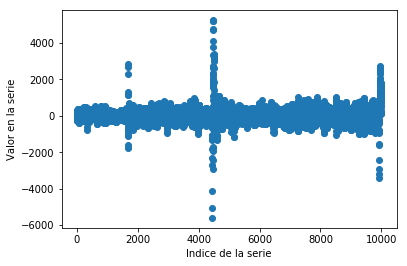

In [40]:
import matplotlib.pyplot as plt
muestra = X[0][0:10000]
x = [x for x in range(1,10001)]
plt.scatter(x,y = muestra)
plt.ylabel('Valor en la serie')
plt.xlabel('Indice de la serie')
plt.show()

Sin embargo, la amplitud de la onda no nos permite identificar a qué tipo de latido corresponde porque simplemente se mide la intensidad en función del tiempo. Para identificar un sonido es necesario obtener las frecuencias de éste y esto se puede hacer gracias a la transformada discreta de fourier donde se hace una transformación lineal de los datos y los pasa de un dominio temporal a un dominio frecuencial, además de una frecuencia principal se tienen más frecuencias en la onda de sonido, esta transformada suma todas las frecuencias involucradas, esto puede verse representado en el siguiente gráfico 

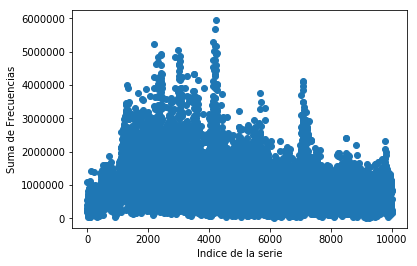

In [41]:
X_fourier = np.abs(np.fft.fft(X))
muestra2 = X_fourier[0][0:10000]
x = [x for x in range(1,10001)]
plt.scatter(x,y = muestra2)
plt.ylabel('Suma de Frecuencias')
plt.xlabel('Indice de la serie')
plt.show()

El valor de la suma no es necesariamente proporcional a la cantidad de frecuencias involucradas (ni a las amplitudes mencionadas en el gráfico anterior) ya que se pueden tener casos de sumas de pocas frecuencias muy altas o sumas de muchas frecuencias muy bajas, esta superposición de frecuencias es lo que nos permite obtener el dato que nos interesa y que nuestro learner va a utilizar.

> g) Para seguir con el pre-procesamiento realice un muestreo representativo de los datos a través de una técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podrı́a determinar si el muestro es representativo?

Utilizando la función signal.resample se puede remuestrear la transformada de fourier, en este caso se harán 100000 remuestreos.

In [42]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

El beneficio de este remuestreo es que reduce la dimensionalidad de la muestra original, esto es bueno siempre y cuando la muestra sea significativa, para ello se calculará la media y la varianza tanto de la población (Transformada de Fourier) como de la muestra de la transformada y se compararán gráficamente.

In [43]:
m_muestreo = []
s_muestreo = []
m_fourier = []
s_fourier = []
for i in range (X_fourier.shape[0]):
    m_muestreo.append(np.mean(X_resampled[i]))
    s_muestreo.append(np.std(X_resampled[i]))
    m_fourier.append(np.mean(X_fourier[i]))
    s_fourier.append(np.std(X_fourier[i]))

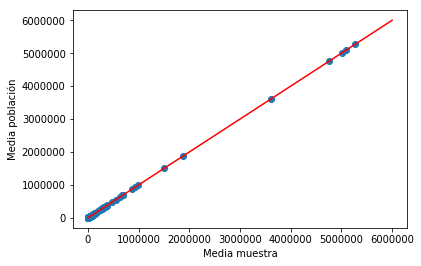

In [44]:
plt.scatter(x = m_muestreo, y = m_fourier)
plt.plot([0,6000000],[0,6000000],color='r') #Y = X 
plt.xlabel('Media muestra')
plt.ylabel('Media población')
plt.show()

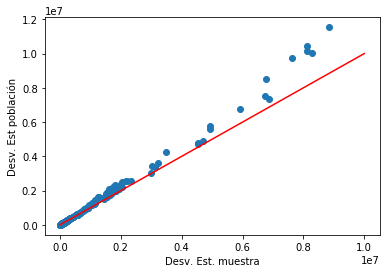

In [45]:
plt.scatter(x = s_muestreo, y = s_fourier)
plt.plot([0,10000000],[0,10000000], color = 'r') #Y = X 
plt.xlabel('Desv. Est. muestra')
plt.ylabel('Desv. Est población')
plt.show()

Del gráfico de las medias se puede ver que la relación es lineal y parece seguir la recta $Y = X$ (Línea roja) denotando la similitud entre ambos grupos. Respecto a las desviaciones estándar se puede ver que en algunos puntos la desviación estándar de la población es mayor a la desviación estándar de la muestra (están sobre la linea roja) la diferencia puede decirse que es considerable en 6 puntos, que corresponden a los últimos puntos ubicados en la esquina superior derecha, pero estos corresponden a $\frac{6}{176} \sim 3,4\%$ por lo que se puede decir que la muestra es significativa al comportarse de igual manera que la población. 

> h) Debido a que no hay conjunto de pruebas, y que es necesario para evaluar la calidad **final** del modelo, genérelo a través de la técnica *hold-out*

Se obtiene un conjunto de entrenamiento y de pruebas cuya proporción es 75/25 respectivamente

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

> i) Realice un proceso de estándarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [47]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

> j) Realice una reducción de dimensionalidad a través de la técnica **PCA**, para representar los datos en $d = 2$ dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.

In [48]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)
print('Dimensión conjunto de entrenamiento: {}'.format(X_pca_train.shape))
print('Dimensión conjunto de entrenamiento: {}'.format(X_pca_test.shape))

Dimensión conjunto de entrenamiento: (132, 2)
Dimensión conjunto de entrenamiento: (44, 2)


Se puede ver que la cantidad de filas no cambió al utilizar PCA (se mantiene la proporción 75/25), sin embargo se pasó de una cantidad de 100000 columnas a 2 columnas como se especificó en el modelo a utilizar. Esto es gracias a la aplicación de una transformación lineal del método PCA para reducir las dimensiones; a continuación, se procederá a graficar ambas columnas de esta matriz.

In [49]:
#Obtenemos columna 1 y columna 2 
componente1 = X_pca_train[:,0]
componente2 = X_pca_train[:,1]
print('Media columna 1: {0} Varianza columna 1: {1}'.format(np.mean(componente1),np.var(componente1)))
print('Media columna 2: {0} Varianza columna 2: {1}'.format(np.mean(componente2),np.var(componente2)))

Media columna 1: 1.3780222754135277e-14 Varianza columna 1: 86676.84091261566
Media columna 2: 7.966691279734456e-15 Varianza columna 2: 5927.912546185384


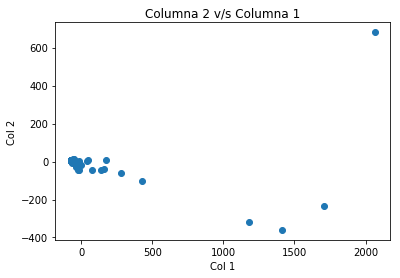

In [50]:
plt.scatter(x=componente1,y=componente2)
plt.title('Columna 2 v/s Columna 1')
plt.xlabel('Col 1')
plt.ylabel('Col 2')
plt.show()

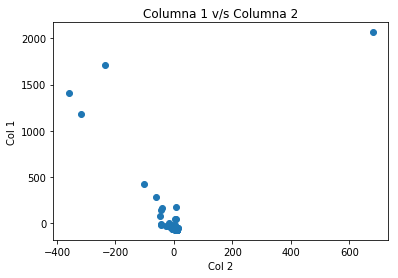

In [51]:
plt.scatter(x=componente2,y=componente1)
plt.title('Columna 1 v/s Columna 2')
plt.xlabel('Col 2')
plt.ylabel('Col 1')
plt.show()

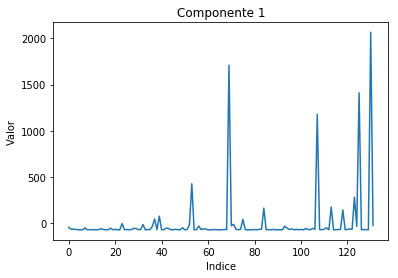

In [52]:
plt.plot(componente1)
plt.title('Componente 1')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

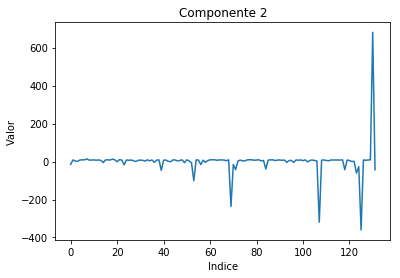

In [53]:
plt.plot(componente2)
plt.title('Componente 2')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

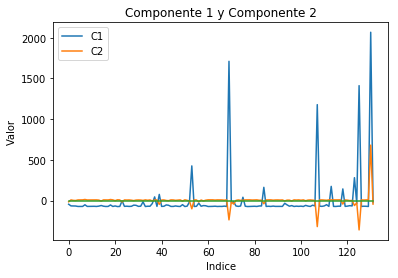

In [54]:
plt.plot(componente1, label = 'C1')
plt.plot(componente2, label = 'C2')
plt.plot([0 for i in range(0,len(componente1))])
plt.title('Componente 1 y Componente 2')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.legend()
plt.show()

Si se grafica una columna en función de otra no se puede observar alguna relación entre ambas columnas, pero si se grafican ambas columnas por separado se obtiene algo interesante, la gráfica tiene similitud a una onda de sonido y la columna 1 es predominantemente positiva mientras que la columna 2 es predominantemente negativa, esto se puede interpretar teniendo el mente el concepto de onda, que hay puntos sobre el eje $Y = 0$ y bajo el eje $Y=0$ debido a la oscilación. 

En este caso el método PCA logró descomponer todas las componentes involucradas en la onda como dos partes, la parte bajo cero y la parte sobre cero en su mayor parte. Obviamente nada de esto es seguro porque al disminuir las dimensiones se genera una combinación lineal de todas las dimensiones para que sigan influyendo lo que puede generar la discrepancia que se observa en la columna 2 ese peak positivo.

Al graficar ambas columnas en un mismo gráfico se tiene que los peaks de la columna 2 corresponden a los peaks de la columna uno pero con valores más bajos, esto podría interpretarse como la frecuencia pura y un ruido asociado a esa frecuencia.

> k) Entrene un modelo de Regresión Logı́stica variando el parámetro de regularización $C$ construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene un Perceptrón, variando el hiper-parámetro de regularización $\alpha$ en el rango inverso que para la Regresión Logı́stica ¿Por qué? Contruya el mismo gráfico resumen, en función de $C$ o $\alpha$. Compare y comente lo observado.  

Para los valores de $C$ en la regresor logístico, corresponden al inverso del factor de penalización, en el caso de la aplicación de L2 corresponde a:  

$$
\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)
$$

Lo cual indica que para menores valores de $C$ entregados, la agresividad de la regularización será mayor. Para la implementación en _sklearn_, $y_{i}$ toma valores -1 o 1 como ambas clases posibles.

Por otro lado, el valor $\alpha$ en la regularización del perceptron via L2 indica lel factor de dicha regularización, presentada en la siguiente función objetivo:  

$$
\min_{w} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}
$$

Como se aprecia, para mayores valores de $\alpha$, la regularización se torna mas agresiva, de manera opuesta al caso del parámetro $C$ en la implementación del regresor lineal, lo cual explica la decisión de usar el inverso de $C$ como valor de $\alpha$ para comparar ambos métodos.

Es importante considerar que en el siguiente gráfico, se cumple la igualdad:


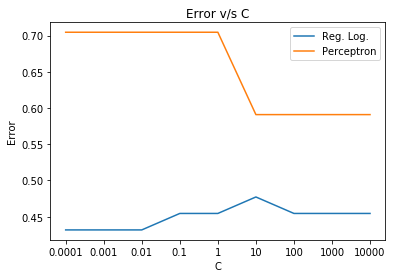

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = [1/c for c in Cs]
from sklearn.linear_model import Perceptron as Perc, LogisticRegression as LogR
Log_Regs = [LogR(penalty='l2', C=c, max_iter=200, multi_class='ovr').fit(X_pca_train, y_train) for c in Cs]
Perceps = [Perc(penalty='l2', alpha=a, max_iter=200).fit(X_pca_train, y_train) for a in alphas]

Perf_Log_Reg = [1-accuracy_score(y_test, model.predict(X_pca_test), normalize=True, sample_weight=None) for model in Log_Regs]
Perf_Perceps = [1-accuracy_score(y_test, model.predict(X_pca_test), normalize=True, sample_weight=None) for model in Perceps]
plt.plot(Perf_Log_Reg, label="Reg. Log.")
plt.plot(Perf_Perceps, label="Perceptron")
plt.title("Error v/s C")
plt.ylabel("Error")
plt.xlabel("C")
plt.xticks(range(0,len(Cs)), Cs)
plt.legend()
plt.show()

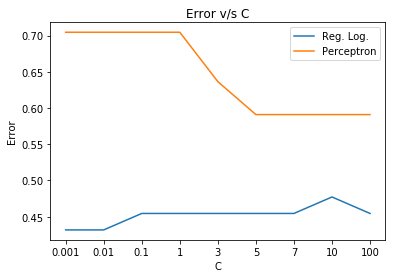

In [57]:
from sklearn.metrics import accuracy_score
Cs = [0.001,0.01,0.1,1,3,5,7,10,100]
alphas = [1/c for c in Cs]
from sklearn.linear_model import Perceptron as Perc, LogisticRegression as LogR
Log_Regs = [LogR(penalty='l2', C=c, max_iter=200, multi_class='ovr').fit(X_pca_train, y_train) for c in Cs]
Perceps = [Perc(penalty='l2', alpha=a, max_iter=200).fit(X_pca_train, y_train) for a in alphas]

Perf_Log_Reg = [1-accuracy_score(y_test, model.predict(X_pca_test), normalize=True, sample_weight=None) for model in Log_Regs]
Perf_Perceps = [1-accuracy_score(y_test, model.predict(X_pca_test), normalize=True, sample_weight=None) for model in Perceps]

coefs = []
for model in Perceps:
    coefs.append(model.coef_)


plt.plot(Perf_Log_Reg, label="Reg. Log.")
plt.plot(Perf_Perceps, label="Perceptron")
plt.title("Error v/s C")
plt.ylabel("Error")
plt.xlabel("C")
plt.xticks(range(0,len(Cs)), Cs)
plt.legend()
plt.show()

> l) Genere otra representación de los datos a través de la técnica de reducción de dimensionalidad **ICA**, con dimensionalidad $d = 2$. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones. Vuelva a realizar el item k) pero para esta nueva representación.  

ICA corresponde a un método computacional que se utiliza en el procesamiento de señales. Lo que hace es separar señales multivariadas en subcomponentes aditivos. Esto se logra asumiendo que los subcomponentes no son señales Gaussianas e independientes, a diferencia del modelo PCA, que busca descomponer los datos en las $k$ dimensiones que expliquen de mejor manera la variabilidad de los datos, asumiendo que al elegir un vector, el siguiente es ortogonal a este.

In [58]:
from sklearn.decomposition import FastICA
ica_model = FastICA(n_components=d)
ica_model.fit(X_train)
X_ica_train = ica_model.transform(X_train)
X_ica_test = ica_model.transform(X_test)
print('Dimensión conjunto de entrenamiento: {}'.format(X_ica_train.shape))
print('Dimensión conjunto de prueba: {}'.format(X_ica_test.shape))

Dimensión conjunto de entrenamiento: (132, 2)
Dimensión conjunto de prueba: (44, 2)


Como el caso de la aplicación de PCA, se mantuvo la proporcionalidad de los conjuntos 3:1, reduciendo la dimensionalidad especificadad $d=2$.

In [59]:
#Obtenemos columna 1 y columna 2 
componente1 = X_ica_train[:,0]
componente2 = X_ica_train[:,1]

print('Media columna 1: {0} Varianza columna 1: {1}'.format(np.mean(componente1),np.var(componente1)))
print('Media columna 2: {0} Varianza columna 2: {1}'.format(np.mean(componente2),np.var(componente2)))

Media columna 1: -7.569702440626067e-18 Varianza columna 1: 0.007575757575757611
Media columna 2: -5.046468293750712e-18 Varianza columna 2: 0.0075757575757575595


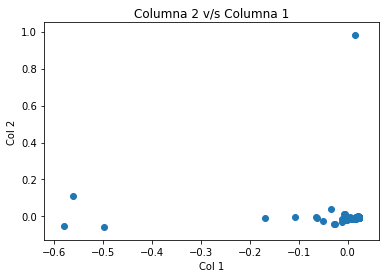

In [60]:
plt.scatter(x=componente1,y=componente2)
plt.title('Columna 2 v/s Columna 1')
plt.xlabel('Col 1')
plt.ylabel('Col 2')
plt.show()

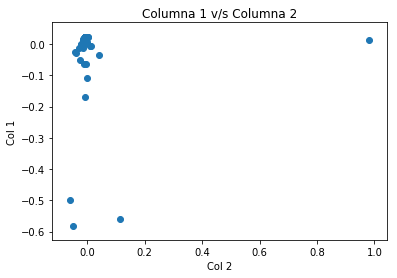

In [61]:
plt.scatter(x=componente2,y=componente1)
plt.title('Columna 1 v/s Columna 2')
plt.xlabel('Col 2')
plt.ylabel('Col 1')
plt.show()

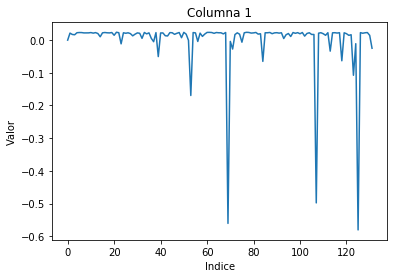

In [62]:
plt.plot(componente1)
plt.title('Columna 1')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

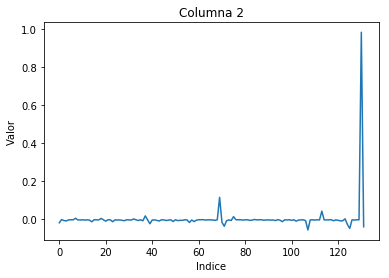

In [63]:
plt.plot(componente2)
plt.title('Columna 2')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

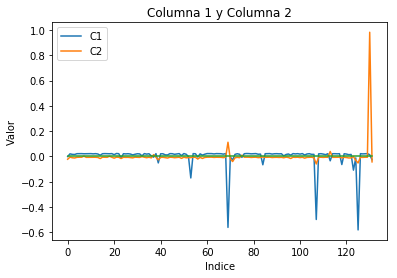

In [64]:
plt.plot(componente1, label = 'C1')
plt.plot(componente2, label = 'C2')
plt.plot([0 for i in range(0,len(componente1))])
plt.title('Columna 1 y Columna 2')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.legend()
plt.show()

Si se grafica una columna en función de otra no se puede observar alguna relación entre ambas columnas, pero si se grafican ambas columnas por separado se obtiene algo interesante, la gráfica tiene similitud a una onda de sonido, pero, en comparación a la gráfica obtenida con el método PCA, los valores tienen signo opuesto, siguiendo un comportamiento cualitativo practicamente idéntico, excepto por el último valor de la columna 1, donde se presume que dicha disminución es compensada por el valor presente en la columna 2.

En este caso el método ICA logró descomponer todas las componentes involucradas en la onda como dos partes, la parte bajo cero y la parte sobre cero en su mayor parte. Como el comportamiento es practicamente el mismo respecto al modelo anterior, también se aplican las observaciones ya mencionadas.



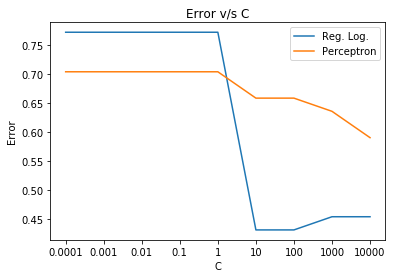

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = [1/c for c in Cs]
from sklearn.linear_model import Perceptron as Perc, LogisticRegression as LogR
Log_Regs = [LogR(penalty='l2', C=c, max_iter=200, multi_class='ovr').fit(X_ica_train, y_train) for c in Cs]
Perceps = [Perc(penalty='l2', alpha=a, max_iter=200).fit(X_ica_train, y_train) for a in alphas]

Perf_Log_Reg = [1-accuracy_score(y_test, model.predict(X_ica_test), normalize=True, sample_weight=None) for model in Log_Regs]
Perf_Perceps = [1-accuracy_score(y_test, model.predict(X_ica_test), normalize=True, sample_weight=None) for model in Perceps]

plt.plot(Perf_Log_Reg, label="Reg. Log.")
plt.plot(Perf_Perceps, label="Perceptron")
plt.title("Error v/s C")
plt.ylabel("Error")
plt.xlabel("C")
plt.xticks(range(0,len(Cs)), Cs)
plt.legend()
plt.show()

> m) Experimente con diferentes dimensiones $d$ para la proyección de PCA e ICA con el propósito de obtener un modelo con menor error. Construya una tabla o gráfico resumen de los errores o *accuracy*, comente.

In [147]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Ds=range(2, 10)
pca_models = [PCA(n_components=d).fit(X_train) for d in Ds]
ica_models = [FastICA(n_components=d).fit(X_train) for d in Ds]
Xs_pca_train = [model.transform(X_train) for model in pca_models]
Xs_pca_test = [model.transform(X_test) for model in pca_models]
Xs_ica_train = [model.transform(X_train) for model in ica_models]
Xs_ica_test = [model.transform(X_test) for model in ica_models]





In [247]:
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = [1/c for c in Cs]
#fila dimension, columna regulador/[fila][regulador]
Log_Regs_pca = [[LogR(penalty='l2', C=c, max_iter=200, multi_class='ovr').fit(Xs, y_train) for c in Cs] for Xs in Xs_pca_train]
Log_Regs_ica = [[LogR(penalty='l2', C=c, max_iter=200, multi_class='ovr').fit(Xs, y_train) for c in Cs] for Xs in Xs_ica_train]
Perceps_pca = [[Perc(penalty='l2', alpha=a, max_iter=200).fit(Xs, y_train) for a in alphas] for Xs in Xs_pca_train]
Perceps_ica = [[Perc(penalty='l2', alpha=a, max_iter=200).fit(Xs, y_train) for a in alphas] for Xs in Xs_ica_train]
#Usa Cs
Perf_Log_Reg_pca = [[1-accuracy_score(y_test, 
                                      model.predict(Xs_pca_test[i]), 
                                      normalize=True, 
                                      sample_weight=None) for model in Log_Regs_pca[i]
                        ] 
                    for i in range(0,len(Log_Regs_pca))]
#Usa Cs
Perf_Log_Reg_ica = [[1-accuracy_score(y_test, 
                                      model.predict(Xs_ica_test[i]), 
                                      normalize=True, 
                                      sample_weight=None) for model in Log_Regs_ica[i]
                        ] 
                    for i in range(0,len(Log_Regs_ica))]
#Usa alphas
Perf_Percep_pca = [[1-accuracy_score(y_test, 
                                      model.predict(Xs_pca_test[i]), 
                                      normalize=True, 
                                      sample_weight=None) for model in Perceps_pca[i]
                        ] 
                    for i in range(0, len(Perceps_pca))]
#Usa alphas
Perf_Percep_ica = [[1-accuracy_score(y_test, 
                                      model.predict(Xs_ica_test[i]), 
                                      normalize=True, 
                                      sample_weight=None) for model in Perceps_ica[i]
                        ] 
                    for i in range(0,len(Perceps_ica))]

In [152]:
lista = Perf_Log_Reg_pca
dimensiones = []
c1 = []; c2 = []; c3 = []; c4 = []; c5 = []; c6 = []; c7 = []; c8 = []; c9 = []
for i in range(len(lista)):
    dimensiones.append(i + 2)
    c1.append(lista[i][0])
    c2.append(lista[i][1])
    c3.append(lista[i][2])
    c4.append(lista[i][3])
    c5.append(lista[i][4])
    c6.append(lista[i][5])
    c7.append(lista[i][6])
    c8.append(lista[i][7])
    c9.append(lista[i][8])
dictio = {'dimension':dimensiones,
          'c=0,0001':c1,
          'c=0,001':c2,
          'c=0,01':c3,
          'c=0,1':c4,
          'c=1':c5,
          'c=10':c6,
          'c=100':c7,
          'c=1000':c8,
          'c=10000':c9
         }
tabla = pd.DataFrame.from_dict(dictio)
print('Tabla para el modelo de Regresión Logística utilizando PCA de 2 a 9 dimensiones')
tabla

Tabla para el modelo de Regresión Logística utilizando PCA de 2 a 9 dimensiones


,dimension,"c=0,0001","c=0,001","c=0,01","c=0,1",c=1,c=10,c=100,c=1000,c=10000
0,2,0.431818,0.431818,0.431818,0.454545,0.454545,0.477273,0.454545,0.454545,0.454545
1,3,0.431818,0.431818,0.431818,0.431818,0.454545,0.431818,0.409091,0.409091,0.409091
2,4,0.431818,0.431818,0.431818,0.431818,0.431818,0.318182,0.363636,0.363636,0.363636
3,5,0.431818,0.431818,0.409091,0.386364,0.340909,0.318182,0.272727,0.272727,0.272727
4,6,0.454545,0.477273,0.477273,0.363636,0.318182,0.250000,0.227273,0.227273,0.227273
5,7,0.454545,0.545455,0.454545,0.272727,0.250000,0.250000,0.204545,0.204545,0.204545
6,8,0.409091,0.409091,0.340909,0.340909,0.295455,0.295455,0.227273,0.227273,0.272727
7,9,0.409091,0.409091,0.340909,0.340909,0.340909,0.250000,0.227273,0.227273,0.227273


In [153]:
print("Minimo test error:")
tabla.loc[[5]][['dimension', 'c=100','c=1000','c=10000']]

Minimo test error:


,dimension,c=100,c=1000,c=10000
5,7,0.204545,0.204545,0.204545


Matriz de confusion de Reg. Logistica-PCA con d=7 y c=100


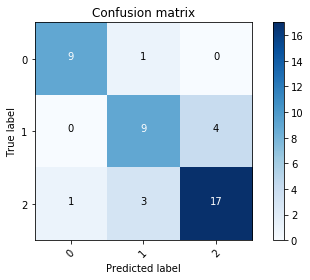

In [223]:
print("Matriz de confusion de Reg. Logistica-PCA con d=7 y c=100")
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, Log_Regs_pca[5][6].predict(Xs_pca_test[5]),sample_weight=None), np.unique(y_test))
plt.show()

Matriz de confusion de Reg. Logistica-PCA con d=7 y c=1000


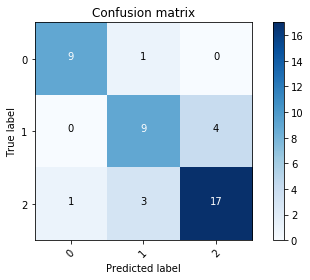

In [224]:
print("Matriz de confusion de Reg. Logistica-PCA con d=7 y c=1000")
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, Log_Regs_pca[5][7].predict(Xs_pca_test[5]), sample_weight=None), np.unique(y_test))
plt.show()

Matriz de confusion de Reg. Logistica-PCA con d=7 y c=10000


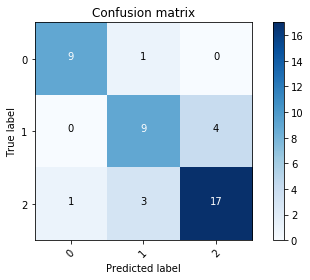

In [225]:
print("Matriz de confusion de Reg. Logistica-PCA con d=7 y c=10000")
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, Log_Regs_pca[5][8].predict(Xs_pca_test[5]), sample_weight=None), np.unique(y_test))
plt.show()

In [163]:
lista = Perf_Log_Reg_ica

dimensiones = []
c1 = []; c2 = []; c3 = []; c4 = []; c5 = []; c6 = []; c7 = []; c8 = []; c9 = []
for i in range(len(lista)):
    dimensiones.append(i + 2)
    c1.append(lista[i][0])
    c2.append(lista[i][1])
    c3.append(lista[i][2])
    c4.append(lista[i][3])
    c5.append(lista[i][4])
    c6.append(lista[i][5])
    c7.append(lista[i][6])
    c8.append(lista[i][7])
    c9.append(lista[i][8])
dictio = {'dimension':dimensiones,
          'c=0,0001':c1,
          'c=0,001':c2,
          'c=0,01':c3,
          'c=0,1':c4,
          'c=1':c5,
          'c=10':c6,
          'c=100':c7,
          'c=1000':c8,
          'c=10000':c9
         }

tabla = pd.DataFrame.from_dict(dictio)
print('Tabla para el modelo de Regresión Logística utilizando ICA de 2 a 9 dimensiones')
tabla

Tabla para el modelo de Regresión Logística utilizando ICA de 2 a 9 dimensiones


,dimension,"c=0,0001","c=0,001","c=0,01","c=0,1",c=1,c=10,c=100,c=1000,c=10000
0,2,0.772727,0.772727,0.772727,0.772727,0.772727,0.431818,0.431818,0.454545,0.454545
1,3,0.772727,0.772727,0.772727,0.772727,0.772727,0.454545,0.454545,0.454545,0.431818
2,4,0.772727,0.772727,0.772727,0.772727,0.772727,0.454545,0.454545,0.454545,0.409091
3,5,0.772727,0.772727,0.772727,0.772727,0.772727,0.454545,0.454545,0.340909,0.318182
4,6,0.772727,0.772727,0.772727,0.772727,0.772727,0.477273,0.500000,0.363636,0.272727
5,7,0.772727,0.772727,0.772727,0.772727,0.750000,0.431818,0.386364,0.363636,0.272727
6,8,0.772727,0.772727,0.772727,0.772727,0.545455,0.500000,0.386364,0.318182,0.340909
7,9,0.772727,0.772727,0.772727,0.772727,0.545455,0.500000,0.363636,0.318182,0.295455


In [164]:
print("Minimo error:")
tabla.loc[[4,5]][['dimension', 'c=10000']]

Minimo error:


,dimension,c=10000
4,6,0.272727
5,7,0.272727


Matriz de confusion de Reg. Logistica-ICA con d=7 y c=10000
0.7272727272727273


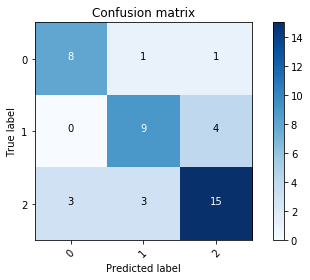

In [237]:
print("Matriz de confusion de Reg. Logistica-ICA con d=6 y c=10000")
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, Log_Regs_ica[4][8].predict(Xs_ica_test[4]), sample_weight=None), np.unique(y_test))
plt.show()

Matriz de confusion de Reg. Logistica-ICA con d=7 y c=10000


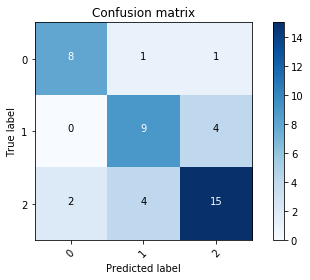

In [239]:
print("Matriz de confusion de Reg. Logistica-ICA con d=7 y c=10000")
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, Log_Regs_ica[5][8].predict(Xs_ica_test[5]), sample_weight=None), np.unique(y_test))
plt.show()

In [248]:
lista = Perf_Percep_pca

dimensiones = []
c1 = []; c2 = []; c3 = []; c4 = []; c5 = []; c6 = []; c7 = []; c8 = []; c9 = []
for i in range(len(lista)):
    dimensiones.append(i + 2)
    c1.append(lista[i][0])
    c2.append(lista[i][1])
    c3.append(lista[i][2])
    c4.append(lista[i][3])
    c5.append(lista[i][4])
    c6.append(lista[i][5])
    c7.append(lista[i][6])
    c8.append(lista[i][7])
    c9.append(lista[i][8])
dictio = {'dimension':dimensiones,
          'alpha=0,0001':c9,
          'alpha=0,001':c8,
          'alpha=0,01':c7,
          'alpha=0,1':c6,
          'alpha=1':c5,
          'alpha=10':c4,
          'alpha=100':c3,
          'alpha=1000':c2,
          'alpha=10000':c1
         }
tabla = pd.DataFrame.from_dict(dictio)
print('Tabla para el modelo de Perceptron utilizando PCA de 2 a 9 dimensiones')
tabla

Tabla para el modelo de Perceptron utilizando PCA de 2 a 9 dimensiones


,dimension,"alpha=0,0001","alpha=0,001","alpha=0,01","alpha=0,1",alpha=1,alpha=10,alpha=100,alpha=1000,alpha=10000
0,2,0.590909,0.590909,0.590909,0.590909,0.704545,0.704545,0.704545,0.704545,0.704545
1,3,0.613636,0.590909,0.590909,0.590909,0.704545,0.704545,0.704545,0.704545,0.704545
2,4,0.477273,0.636364,0.590909,0.590909,0.704545,0.704545,0.704545,0.704545,0.704545
3,5,0.454545,0.636364,0.590909,0.590909,0.704545,0.704545,0.704545,0.704545,0.704545
4,6,0.454545,0.522727,0.590909,0.590909,0.704545,0.704545,0.704545,0.704545,0.704545
5,7,0.613636,0.568182,0.545455,0.590909,0.704545,0.704545,0.704545,0.704545,0.704545
6,8,0.477273,0.659091,0.545455,0.568182,0.704545,0.704545,0.704545,0.704545,0.704545
7,9,0.477273,0.363636,0.454545,0.568182,0.704545,0.704545,0.704545,0.704545,0.704545


In [255]:
print("Minimo error:")
tabla.loc[[7]][['dimension', 'alpha=0,001']]

Minimo error:


,dimension,"alpha=0,001"
7,9,0.363636


Matriz de confusion de Perceptron-PCA con d=9 y alpha=0,001


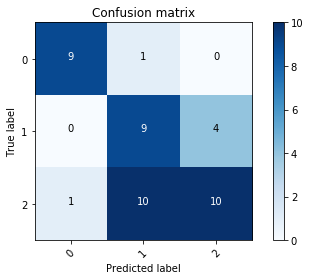

In [261]:
print("Matriz de confusion de Perceptron-PCA con d=9 y alpha=0,001")
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, Perceps_pca[7][-2].predict(Xs_pca_test[7])), np.unique(y_test))
plt.show()

In [262]:
lista = Perf_Percep_ica

dimensiones = []
c1 = []; c2 = []; c3 = []; c4 = []; c5 = []; c6 = []; c7 = []; c8 = []; c9 = []
for i in range(len(lista)):
    dimensiones.append(i + 2)
    c1.append(lista[i][0])
    c2.append(lista[i][1])
    c3.append(lista[i][2])
    c4.append(lista[i][3])
    c5.append(lista[i][4])
    c6.append(lista[i][5])
    c7.append(lista[i][6])
    c8.append(lista[i][7])
    c9.append(lista[i][8])
dictio = {'dimension':dimensiones,
          'alpha=0,0001':c9,
          'alpha=0,001':c8,
          'alpha=0,01':c7,
          'alpha=0,1':c6,
          'alpha=1':c5,
          'alpha=10':c4,
          'alpha=100':c3,
          'alpha=1000':c2,
          'alpha=10000':c1
         }
tabla = pd.DataFrame.from_dict(dictio)
print('Tabla para el modelo de Perceptron utilizando ICA de 2 a 9 dimensiones')
tabla

Tabla para el modelo de Perceptron utilizando ICA de 2 a 9 dimensiones


,dimension,"alpha=0,0001","alpha=0,001","alpha=0,01","alpha=0,1",alpha=1,alpha=10,alpha=100,alpha=1000,alpha=10000
0,2,0.590909,0.636364,0.659091,0.659091,0.704545,0.704545,0.704545,0.704545,0.704545
1,3,0.590909,0.590909,0.590909,0.613636,0.704545,0.704545,0.704545,0.704545,0.704545
2,4,0.590909,0.613636,0.590909,0.590909,0.704545,0.704545,0.704545,0.704545,0.704545
3,5,0.590909,0.590909,0.636364,0.659091,0.704545,0.704545,0.704545,0.704545,0.704545
4,6,0.568182,0.568182,0.568182,0.636364,0.704545,0.704545,0.704545,0.704545,0.704545
5,7,0.590909,0.590909,0.568182,0.636364,0.704545,0.704545,0.704545,0.704545,0.704545
6,8,0.590909,0.681818,0.590909,0.613636,0.704545,0.704545,0.704545,0.704545,0.704545
7,9,0.500000,0.681818,0.568182,0.704545,0.704545,0.704545,0.704545,0.704545,0.704545


In [205]:
print("Minimo error:")
tabla.loc[[7]][['dimension', 'alpha=0,0001']]

Minimo error:


,dimension,"alpha=0,0001"
7,9,0.5


Matriz de confusion de Perceptron-ICA con d=9 y alpha=0,0001
0.5


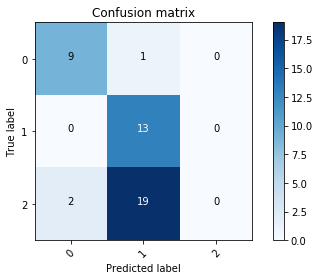

In [265]:
print("Matriz de confusion de Perceptron-ICA con d=9 y alpha=0,0001")
print(accuracy_score(y_test, Perceps_ica[7][-1].predict(Xs_ica_test[7])))
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, Perceps_ica[7][-1].predict(Xs_ica_test[7])), np.unique(y_test))
plt.show()

El metodo que obtuvo el menor error de clasificación corresponde al regresor logístico con reducción PCA. Esto tiene sentido debido a que las señales de audio no son independientes entre si respecto a las frecuencias, lo cual rompe el supuesto de independencia planteado por el método ICA, explicando su menor desempeño incluso a que esta diseñado a trabajar señales.

> n) Realice otra reducción de dimensionalidad ahora a través de la técnica **LDA**, para representar los datos en $d = 2$ dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un *warning* explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model = LDA(n_components=2)
lda_model.fit(X_train,y_train)
X_lda_train = lda_model.transform(X_train)
X_lda_test = lda_model.transform(X_test)
print('Dimensión conjunto de entrenamiento: {}'.format(X_lda_train.shape))
print('Dimensión conjunto de prueba: {}'.format(X_lda_test.shape))

/home/briquelme/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Dimensión conjunto de entrenamiento: (132, 2)
Dimensión conjunto de prueba: (44, 2)


Se puede apreciar que la proporción 3:1 entre los conjuntos de entrenamiento y prueba se mantiene, reduciendo correctamente la dimensionalidad.

El warning presentado por la ejecución del modelo indica que existen atributos que son linealmente dependientes, es decir, podria causar estragos en el cálculo matricial dentro del modelo debido a la obtención de determinantes 0, potencialmente causa la reducción de la precisión del modelo per se. También puede presentarse como ruido en la clasisifcación, debido a la colinearidad de los atributos, una modificación en uno de ellos es compensado por los otros atributos colineales con el primero. Es posible que a través de LDA se elimine la colinealidad presentada, o entregar resultados mediocres en comparación a otros métodos, por lo cual se estudiara de manera experimental dicho comportamiento, o incluso ambas variables sean colineales.

In [87]:
#Obtenemos columna 1 y columna 2 
componente1 = X_lda_train[:,0]
componente2 = X_lda_train[:,1]
print('Media columna 1: {0} Varianza columna 1: {1}'.format(np.mean(componente1),np.var(componente1)))
print('Media columna 2: {0} Varianza columna 2: {1}'.format(np.mean(componente2),np.var(componente2)))

Media columna 1: 6.069219201284189e-15 Varianza columna 1: 18.927973338334425
Media columna 2: -2.153159805333637e-16 Varianza columna 2: 10.495612922306274


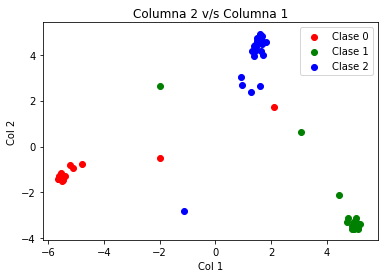

In [135]:

cdict= {0:"r", 1:"g", 2:"b"}
fig, ax = plt.subplots()

for g in np.unique(y_train):
    ix = np.where(y_train == g)
    ax.scatter(componente1[ix], componente2[ix], c = cdict[g], label = "Clase "+str(g))
ax.legend()
plt.title('Columna 2 v/s Columna 1')
plt.xlabel('Col 1')
plt.ylabel('Col 2')
plt.show()

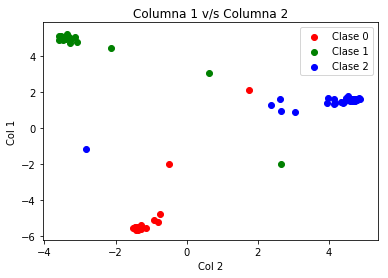

In [136]:
cdict= {0:"r", 1:"g", 2:"b"}
fig, ax = plt.subplots()

for g in np.unique(y_train):
    ix = np.where(y_train == g)
    ax.scatter(componente2[ix], componente1[ix], c = cdict[g], label = "Clase "+str(g))
ax.legend()
plt.title('Columna 1 v/s Columna 2')
plt.xlabel('Col 2')
plt.ylabel('Col 1')
plt.show()

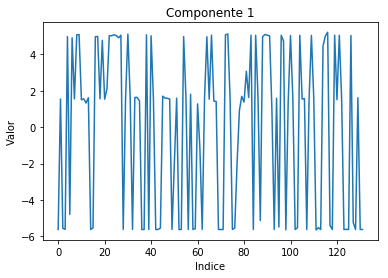

In [90]:
plt.plot(componente1)
plt.title('Componente 1')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

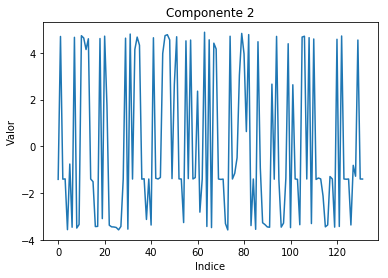

In [91]:
plt.plot(componente2)
plt.title('Componente 2')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

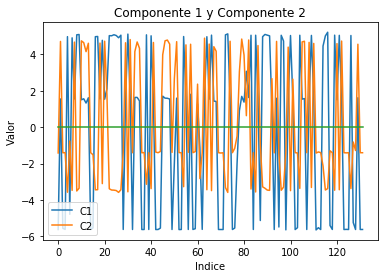

In [92]:
plt.plot(componente1, label = 'C1')
plt.plot(componente2, label = 'C2')
plt.plot([0 for i in range(0,len(componente1))])
plt.title('Componente 1 y Componente 2')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.legend()
plt.show()

> o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) en el nuevo espacio generado por la representación según las $d$ dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.

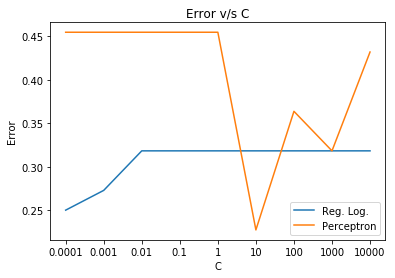

In [93]:
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = [1/c for c in Cs]
Log_Regs = [LogR(penalty='l2', C=c, max_iter=200, multi_class='ovr').fit(X_lda_train, y_train) for c in Cs]
Perceps = [Perc(penalty='l2', alpha=a, max_iter=200).fit(X_lda_train, y_train) for a in alphas]

Perf_Log_Reg_lda = [1-accuracy_score(y_test, model.predict(X_lda_test), normalize=True, sample_weight=None) for model in Log_Regs]
Perf_Perceps_lda = [1-accuracy_score(y_test, model.predict(X_lda_test), normalize=True, sample_weight=None) for model in Perceps]

plt.plot(Perf_Log_Reg_lda, label="Reg. Log.")
plt.plot(Perf_Perceps_lda, label="Perceptron")
plt.title("Error v/s C")
plt.ylabel("Error")
plt.xlabel("C")
plt.xticks(range(0,len(Cs)), Cs)
plt.legend()
plt.show()

In [137]:
print("Error minimo: {}".format(min(Perf_Perceps_lda)))

Error minimo: 0.2272727272727273


> p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterı́sticas (*feature crafting*) a partir de los datos brutos (secuencia de amplitudes).

## 3. Análisis de emociones en *tweets*

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad de un trozo de texto, es decir, clasificar una determinada evaluación escrita (review ), en que una persona manifiesta una opinión, como positiva, negativa o neutral. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.

<img src="https://image.flaticon.com/sprites/new_packs/132222-color-emotions-assets.png" width="40%" />



Para esta actividad se trabajará con un datasets de tweets ofrecidos por CrowdFlower[[8]](#refs). Cada *tweet* está
asociado a una emoción en particular, donde el conjunto de emociones se trabajarán como mutuamente excluyentes, siendo un problema de múltiples clases.

Los datos pueden ser descargados ejecutando el siguiente código en sistema Unix:
```
wget https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv
```

Para aumentar la eficacia de las caracterı́sticas extraı́das es conveniente ejecutar algunas técnicas de pre-procesamiento básicas.

> a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros por clase y describa el dataset.
```python
import pandas as pd
df = pd.read_csv('./emotionanalysis/text_emotion.csv')
```

Se crea la siguiente función como ayuda para presentar matrices de confusión en el futuro.

In [1]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [2]:
import pandas as pd
df = pd.read_csv('./text_emotion.csv', encoding='utf-8')
print("Dimensión del dataset: {0}".format(df.shape))
df.head()

Dimensión del dataset: (40000, 4)


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


Al cargar el dataset a trabajar, se puede apreciar que contiene 40000 entradas, con 4 columnas para cada una. Dichas columnas corresponden a:  
* *tweet_id:* identificador único para cada tweet en el dataset.  
* *sentiment:* estado de emoción ligado al tweet.  
* *author:* nombre de usuario del autor del tweet.  
* *content:* texto contenido en el tweet.  

De manera preliminar, las clases interesantes corresponden a *sentiment* y *content*, debido a que corresponden a los datos de estudio ya planteados. También podria resultar interesante estudiar la tendencia emocional de los usuarios, pero este estudio no resultaria principalmente interesante en el área de machine learning.

In [3]:
print("Cantidad de emociones presentes en el dataset: {0}".format(len(df.sentiment.unique().tolist())))
print(df["sentiment"].value_counts())

Cantidad de emociones presentes en el dataset: 13
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64


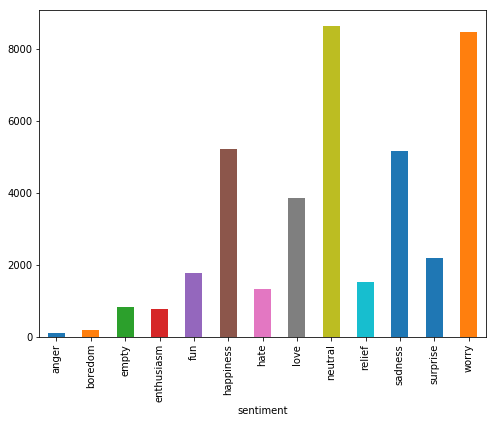

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('sentiment').content.count().plot.bar(ylim=0)
plt.show()

Se puede apreciar que las categorias de la muestra están desbalanceadas, con una tendencia a las emociones *"neutral"* y *"worry"*. Esto podria causar una tendencia al modelo de preferir la predicción de dichos sentimientos, ignorando el resto de las clases existentes. Entre las medidas para combatir este problema, se encuentra obtener mayor cantidad de muestra, esperando diluir la concentración de las clases conflictivas. Para el caso a trbajar es practicamente inviablle.  
Otra medida para combatir el ruido generado por dicho desbalanceo sería cambiar la métrica de desempeño. Entre las existentes se encuentra la matriz de confusión, para evaluar que tan correcta sea la clasificación de las clases poco representativas. También se puede derivar la precisión en cada clase, conociendo el porcentaje de positivos verdaderos respecto a los positivos entregados. Otra opción para combatir el problema corresponde al oversampling, duplicando los casos de las clases escasas, y undersampling, reduciendo los casos de las clases excesivas. Mas adelante se experimentará con undersampling para verificar su efectividad en este estudio.

> b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos. Genere un conjunto de validación si estima conveniente.
```python
import numpy as np
np.seed(70)
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
```

In [5]:
import numpy as np
np.random.seed(70)
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

Si se desea elegir una nueva máscara, solo basta cambiar el valor del parámetro de la seed, en la linea 2. Para el caso estudiado, se empleó el valor 70 como seed.

> c) Construya las representaciones de los datos con los que trabajará, ya sea para las entradas de los modelos como para las salidas. Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros. 

Se dedice representar los datos como un vector de ocurrencias de palabras, lo cual requiere extraer las palabras de la muestra de datos, posteriormente construyendo vectores que representen la presencia de palabras.  
Como primera parte, se debe extraer las palabras, lo cual se realizará a través de un word lemmatizer, debido a su capacidad de mantener el significado de las palabras al extraerlas. Otro detalle importante de este preprocesamiento, es eliminar posibles elementos que generen ruido en la muesta, de las cuales destacan las siguientes: 
* Se asume que los tweets están escritos en inglés.  
* Se eliminan hipervínculos y correos presentes en el contenido.  
* Se eliminan menciones de usuarios, y el símbolo de hashtag.  

Estas correcciones se realizarán con la ayuda de expresiones regulares.  
De manera preeliminar, se omitira el procesamiento de los acrónimos, palabras con errores ortográficos o errores de espaciado, para estudiar el comportamiento inicial del espacio de muestra destinado al entrenamiento.

In [6]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize

def word_extractor(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english') #diccionario en ingles
    text = text.lower()#minusculas
    text = re.sub(r'(https?:\/\/)(\s)?(www\.)?(\s?)(\w+\.)*([\w\-\s]+\/)*([\w-]+)\/?', r'', text) # Elimina links
    text = re.sub(r'^([a-zA-Z0-9_\-\.]+)@((\[[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.)|(([a-zA-Z0-9\-]+\.)+))([a-zA-Z]{2,4}|[0-9]{1,3})(\]?)$', 
                  r'', text) #elimina emails
    text = re.sub(r'(\w)\1+', r'\1\1' , text) #reduce secuencias de 3 o mas de la misma letra a 2. Ortografia ingles
    text = re.sub(r'@\w+', r'', text, flags=re.IGNORECASE)#elimina menciones de usuarios
    text = re.sub(r' #(\w+)', r'\1', text, flags=re.IGNORECASE)#elimina signo de hashtag
    text = re.sub(r'( +)', r' '    , text)#elimina espacio muerto
    text = re.sub(r'\d+', r'', text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words 

Posteriormente, se crea la representación del dataset, considerando las emoción del tweet y su contenido, el cual será representado según la ocurrencias de palabras del vocabulario del espacio muestral.

In [7]:
sentiment_train = df_train["sentiment"]
content_train = df_train["content"]
sentiment_test = df_test["sentiment"]
content_test = df_test["content"]
print(len(content_train))

31990


Usando el comando *time* a través de cell magic, se medirá el tiempo tomado para procesar los contenidos del tweet previos a su vectorización. Se obtuvo un tiempo cercano a los 20 segundos al procesar en su totalidad los datos empleando un procesador _Intel i5-6200U_.

In [8]:
%%time
content_processed_train = [word_extractor(text) for text in content_train]
content_processed_test = [word_extractor(text) for text in content_test]

CPU times: user 20.4 s, sys: 536 ms, total: 20.9 s
Wall time: 21.3 s


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')#creamos vectorizador
vectorizer.fit(np.asarray(content_processed_train))#usamos conjunto train como diccionario

#vectorizamos los contenidos
features_train = vectorizer.transform(content_processed_train)
features_test = vectorizer.transform(content_processed_test)

#los sentimientos asociados
labels_train = np.asarray(sentiment_train.astype(str))
labels_test = np.asarray(sentiment_test.astype(str))

#nombres de las palabras
vocab = vectorizer.get_feature_names()

dist = list(np.array(features_train.sum(axis=0)).reshape(-1,))


In [10]:
print("Largo del vocabulario: {0}".format(len(vocab)))

Largo del vocabulario: 23335


Actualmente se obtiene un vocabulario de tamaño 23335, correspondiente a la dimensionalidad del problema. Lamentablemente, esto implica la existencia de la maldición de la complejidad en este problema.

> d) Entrene y compare al menos 4 de los diferentes clasificadores vistos en clases para clasificación (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logı́stica y Perceptrón). Recuerde que algunos son extendidos por defecto a múltiples clases para detectar emociones en cada *tweet*, sin embargo, otros deben ser extentidos a través de otras técnicas, tal como *One vs One* y *One vs All/Rest*. Muestre tabla o gráfico resumen.


```python
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)
#or for LR
LogisticRegression(multi_class= 'ovr' or 'multinomial')
```

Como primer clasificador se emplea NBC multinomial, debido a que este trabaja con atributos discretos (por ejemplo, **cantidad de ocurrencias del atributo**) y de manera multiclase, lo cual corresponde al problema de estudio de este segmento. Se presume que la implementación de MNBC multiclases emplea el método OvO, lo cual hace interesante probar el rendimiento de la

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#instanciamos clasificador
mnnb = MultinomialNB()
ovr_mnnb = OneVsRestClassifier(MultinomialNB())

#entrenamiento
mnnb.fit(
    features_train,
    labels_train)
ovr_mnnb.fit(
    features_train,
    labels_train)

#predicciones
y_pred = mnnb.predict(features_test)
y_pred_ovr = ovr_mnnb.predict(features_test)

MNNB.- Precision de un total de 8010 pruebas : 31.98501872659176%


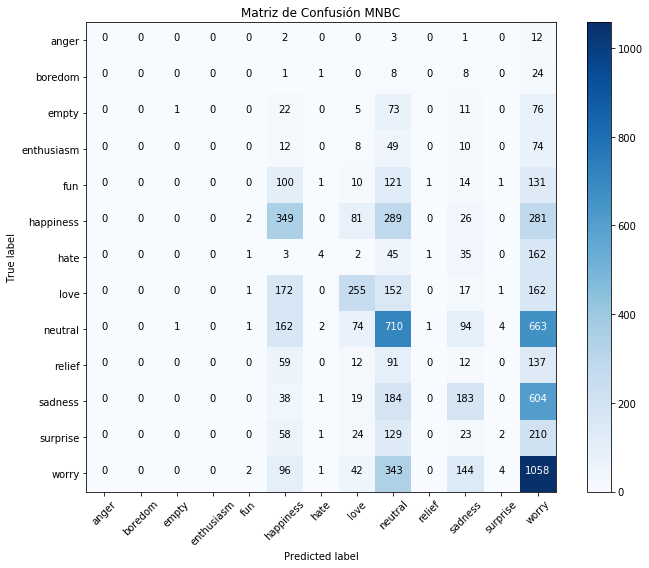

In [12]:
print("MNNB.- Precision de un total de {} pruebas : {}%"
      .format(
          features_test.shape[0],
          accuracy_score(labels_test, y_pred, normalize=True, sample_weight=None)*100)
     )
plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred, sample_weight=None),np.unique(mnnb.classes_),
                      title="Matriz de Confusión MNBC")
plt.show()


MNNB-OvR.- Precision de un total de 8010 pruebas : 32.15980024968789%


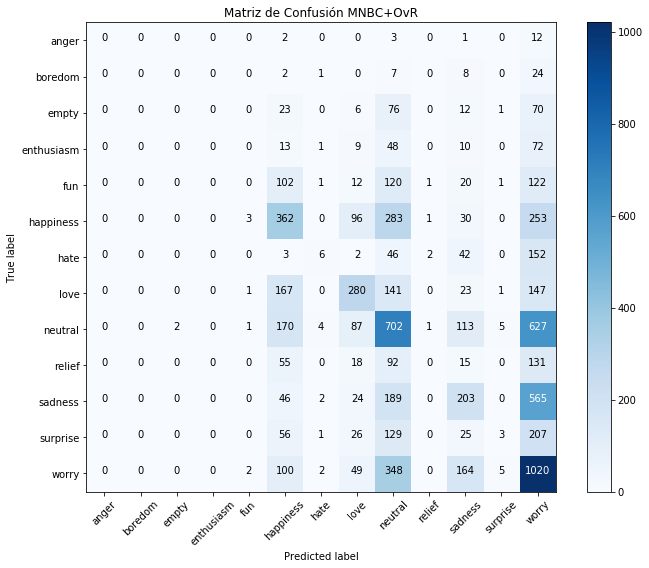

In [13]:
print("MNNB-OvR.- Precision de un total de {} pruebas : {}%"
      .format(
          features_test.shape[0],
          accuracy_score(labels_test, y_pred_ovr, normalize=True, sample_weight=None)*100)
     )

plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_ovr, sample_weight=None),np.unique(ovr_mnnb.classes_),
                      title="Matriz de Confusión MNBC+OvR")
plt.show()


La aplicación de NBC multinomial presenta una performance de 31.98%. Si se aplica la técnica One vs Rest, la performance aumenta a 32.16%. Esta mejora es posiblemente causada por la naturaleza del OvO, que decide la clase correspondiente por votación de los $\frac{N(N-1)}{2}$ clasificadores implicados, causando posibles indeciciones o ser mas susceptible al ruido generado por la sobrerepresentación de ciertas clases, mientras que OvR solo genera espacios donde solo se afirma la clasificación, evitando posibles discrepancias por el método de votación de OvO. También se puede apreciar lo comentado respecto a la sobrerrepresentación de ciertas clases, las cuales concentran la gran cantidad de predicciones realizadas, especialmente la clase _"worry"_.  
Se eligió probar el regresor logístico debido a su funcionamiento clasificador a través de log-odds, ademas de ser compatible con ambos métodos multiclase ya mencionados.

In [14]:
from sklearn.linear_model import LogisticRegression

#instancia clasificador
ovr_LogR = LogisticRegression(random_state = 0, multi_class='ovr')
ovo_LogR = LogisticRegression(random_state = 0, multi_class='multinomial', solver = "saga", max_iter = 1000, n_jobs = -1)

#entrenamiento
ovo_LogR.fit(
    features_train,
    labels_train)
ovr_LogR.fit(
    features_train,
    labels_train)


#predicciones
y1_pred_ovo= ovo_LogR.predict(features_test)
y1_pred_ovr= ovr_LogR.predict(features_test)

OVO-Log. Reg..- Precision de un total de 8010 pruebas : 33.60799001248439%


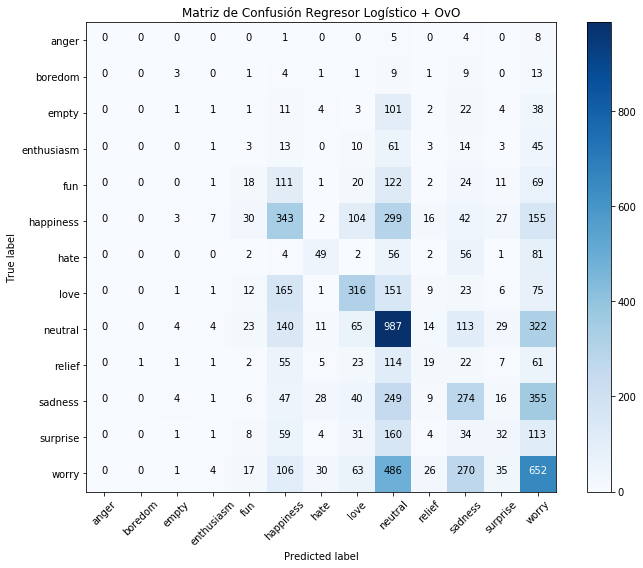

In [15]:
print("OVO-Log. Reg..- Precision de un total de {} pruebas : {}%"
      .format(
          features_test.shape[0],
          accuracy_score(labels_test, y1_pred_ovo, normalize=True, sample_weight=None)*100
          )
     )
plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(labels_test, y1_pred_ovo, sample_weight=None),np.unique(ovo_LogR.classes_), 
                      title="Matriz de Confusión Regresor Logístico + OvO")
plt.show()

OVR-Log. Reg..- Precision de un total de 8010 pruebas : 34.282147315855184%


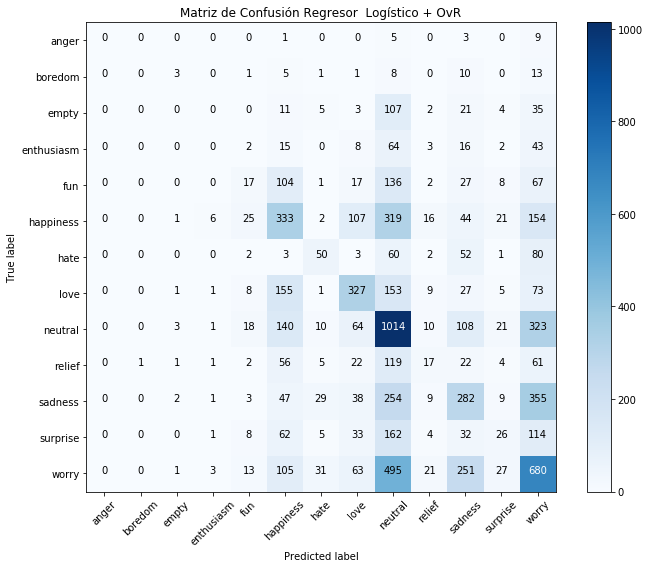

In [16]:
print("OVR-Log. Reg..- Precision de un total de {} pruebas : {}%"
      .format(
          features_test.shape[0],
          accuracy_score(labels_test, y1_pred_ovr, normalize=True, sample_weight=None)*100
          )
     )
plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(labels_test, y1_pred_ovr, sample_weight=None),np.unique(ovr_LogR.classes_), 
                      title="Matriz de Confusión Regresor  Logístico + OvR")
plt.show()

La aplicación de Regresión Logistica OvR tiene una performance de 34.28%, mientras que la OvO tiene una performance de 33.61%, siguiendo lo obtenido en con los métodos de MNBC. También se aprecia una tendencia a las clases sobrerrepresentadas, pero en este caso, la concentración de predicciones tiende a la clase _"neutral"_.  

Por siguiente se emplea el modelo del perceptron, para evaluar su efectividad en un problema de alta complejidad, considerando la simpleza del modelo. Al no ser un modelo multiclase de manera intrinsica, es crucial emplear alguno de los metodos multiclase mencionados.

In [17]:
from sklearn.linear_model import Perceptron

#instancia modelo

perc = Perceptron(fit_intercept=True, max_iter=50, tol=0.001)
ovo_perc = OneVsOneClassifier(perc)
ovr_perc = OneVsRestClassifier(perc)

#entrenamiento

ovo_perc.fit(features_train,
             labels_train)
ovr_perc.fit(features_train,
             labels_train)

y3_pred_ovo = ovo_perc.predict(features_test)
y3_pred_ovr = ovr_perc.predict(features_test)


Perceptron-OVR.- Precision de un total de 8010 pruebas : 24.519350811485644%


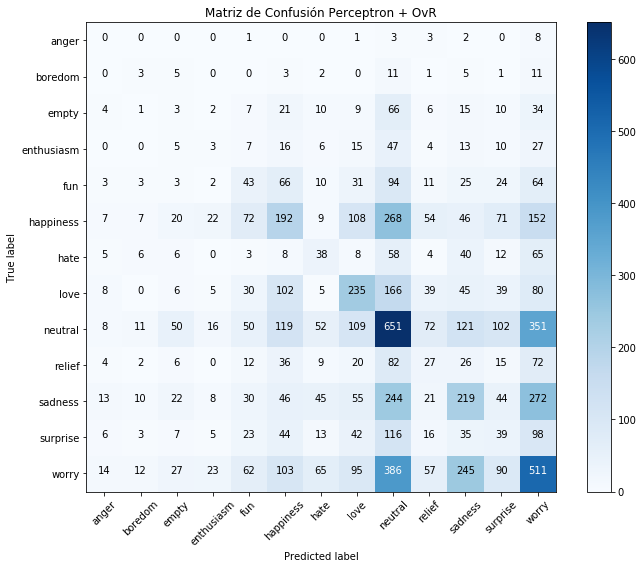

In [18]:
print("Perceptron-OVR.- Precision de un total de {} pruebas : {}%"
      .format(
          features_test.shape[0],
          accuracy_score(labels_test, y3_pred_ovr, normalize=True, sample_weight=None)*100
          )
     )
plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(labels_test, y3_pred_ovr, sample_weight=None),np.unique(ovr_perc.classes_), 
                      title="Matriz de Confusión Perceptron + OvR")
plt.show()

Perceptron-OVO.- Precision de un total de 8010 pruebas : 28.539325842696627%


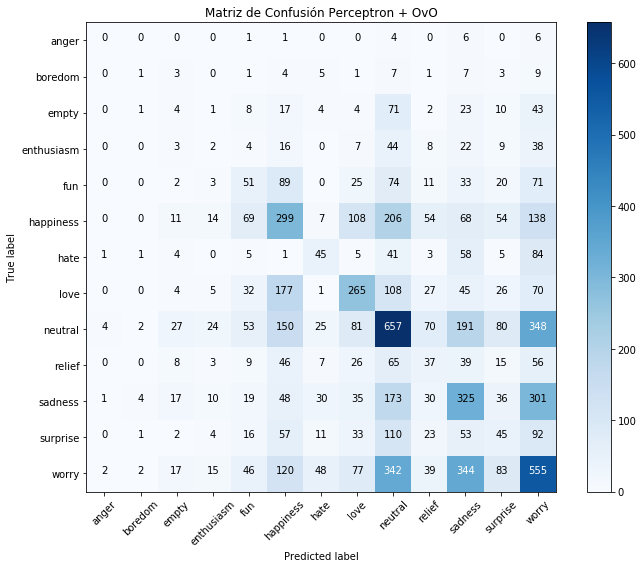

In [19]:
print("Perceptron-OVO.- Precision de un total de {} pruebas : {}%"
      .format(
          features_test.shape[0],
          accuracy_score(labels_test, y3_pred_ovo, normalize=True, sample_weight=None)*100
          )
     )
plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(labels_test, y3_pred_ovo, sample_weight=None),np.unique(ovr_perc.classes_), 
                      title="Matriz de Confusión Perceptron + OvO")
plt.show()

Se puede apreciar que la performance para el Perceptron  con OvR y OvO corresponden a 24.52% y 28.53% respectivamente. El bajo rendimiento puede ser causado por la simplicidad del perceptron, lo cual era de esperarse debido al bajo rendimiento observado en experimentos previos a este. Nuevamente se aprecia el mismo problema de las clases sobrerrepresentadas.

Se decide emplear el modelo LDA debido a su posibilidad de reducir la dimensionalidad de los atributos, ademas de ser capaz de categorizar de manera multiclase.

Para poder emplear el modelo LDA, la muestra de entrenamiento debe ser entregadas como *"dense matrix"* de numpy. Debido a la gran cantidad de datos implicaría un uso ridiculo de RAM al convertir la matriz a una densa, se tomará una submuestra correspondiente al 70% de la muestra original, de manera aleatoria.

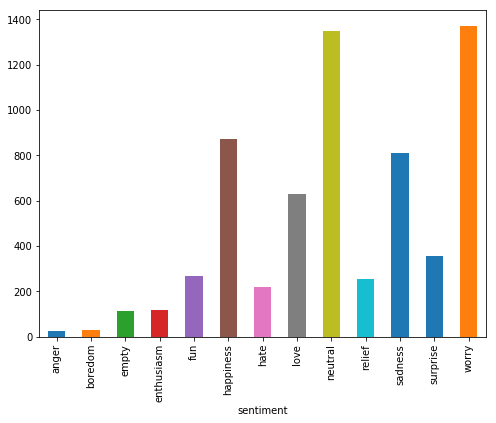

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#reduccion aleatoria de train
np.random.seed(8)
msk = np.random.rand(len(df_train)) < 0.20
df_train_lda = df_train[msk]

#reduccion aleatoria de test
np.random.seed(10)
msk = np.random.rand(len(df_test)) < 0.20
df_test_lda = df_test[msk]

#procesamiento de submuestra
sentiment_train_lda = df_train_lda["sentiment"]
content_train_lda = df_train_lda["content"]
sentiment_test_lda = df_test_lda["sentiment"]
content_test_lda = df_test_lda["content"]

#extraccion de palabras
content_processed_train_lda = [word_extractor(text) for text in content_train_lda]
content_processed_test_lda = [word_extractor(text) for text in content_test_lda]

fig = plt.figure(figsize=(8,6))
df_train_lda.groupby('sentiment').content.count().plot.bar(ylim=0)
plt.show()

In [21]:
#vectorizacion
vectorizer.fit(np.asarray(content_processed_train_lda))#usamos conjunto train como diccionario

#vectorizamos los contenidos
features_train_lda = vectorizer.transform(content_processed_train_lda)
features_test_lda = vectorizer.transform(content_processed_test_lda)

#los sentimientos asociados
labels_train_lda = np.asarray(sentiment_train_lda.astype(str))
labels_test_lda = np.asarray(sentiment_test_lda.astype(str))

#nombres de las palabras
vocab_lda = vectorizer.get_feature_names()

dist_lda = list(np.array(features_train.sum(axis=0)).reshape(-1,))

In [22]:
features_train_lda = features_train_lda.toarray()
features_test_lda = features_test_lda.toarray()
#labels_train_lda = labels_train_lda.toarray()
#labels_test_lda = labels_test_lda.toarray()

In [23]:
#instancia clasificador
lda = LDA(n_components=labels_train_lda.shape[0]-1)


#entrenamiento
lda.fit(
    features_train_lda,
    labels_train_lda)


#predicciones
y2_pred = lda.predict(features_test_lda)

/home/briquelme/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA.- Precision de un total de 8010 pruebas : 18.023255813953487%


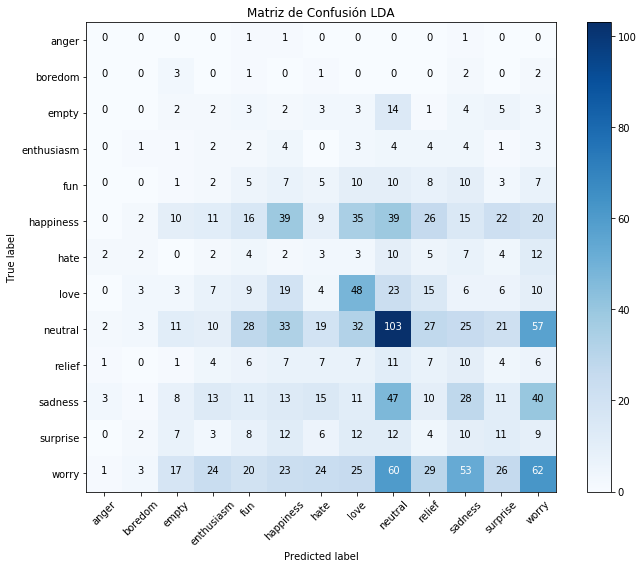

In [29]:
print("LDA.- Precision de un total de {} pruebas : {}%"
      .format(
          features_test.shape[0],
          accuracy_score(labels_test_lda, y2_pred, normalize=True, sample_weight=None)*100
))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(labels_test_lda, y2_pred, sample_weight=None),np.unique(lda.classes_), 
                      title="Matriz de Confusión LDA")
plt.show()

Para el caso del modelo LDA, la precisión obtenida corresponde al 18.02%. Esta baja accurary se puede deber a la colinealidad de los atributos, la cual puede ser causada por la disminución del tamaño de la muestra , o incluso es producido por la sobrerrepresentacion de ciertas clases. Esta colinearidad causa que el modelo no sea confiable como fue explicado en la parte 2 de esta tarea.

> e) Utilice la técnica de ECOC (*Error-Correcting Output-Code*) para extender a multiclases algunos de los clasificadores utilizados en d). Comente lo que hace la técnica y los resultados observados.

Es interesante aplicar dicha técnica en los modelos que no posean la capacidad multiclase de manera nativa, en este caso, el perceptron. Se aplica la misma reducción empleada con el modelo LDA debido a limitaciones de memoria RAM.

In [27]:
from sklearn.multiclass import OutputCodeClassifier
occ_perc = OutputCodeClassifier(perc, code_size = 2, random_state = 0)

occ_perc.fit(features_train_lda,
             labels_train_lda)


OutputCodeClassifier(code_size=2,
           estimator=Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=0.001, verbose=0, warm_start=False),
           n_jobs=1, random_state=0)

ECOC-Perceptron.- Precision de un total de 1720 pruebas : 22.96511627906977%


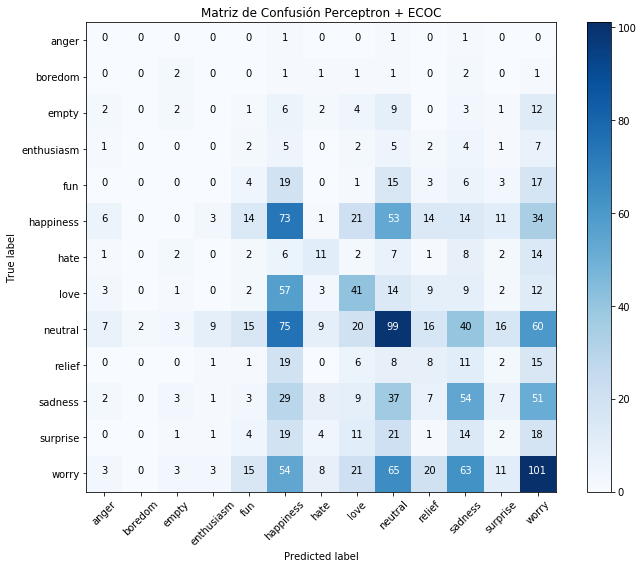

In [30]:
y4_pred_perc = occ_perc.predict(features_test_lda)


print("ECOC-Perceptron.- Precision de un total de {} pruebas : {}%"
      .format(
          features_test_lda.shape[0],
          accuracy_score(labels_test_lda, y4_pred_perc, normalize=True, sample_weight=None)*100
))

plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(labels_test_lda, y4_pred_perc, sample_weight=None),np.unique(occ_perc.classes_), 
                      title="Matriz de Confusión Perceptron + ECOC")
plt.show()

Pese a tener un peor rendimiento general respecto a las otras aplicaciones del perceptron, se aprecia una disminución de los falsos positivos en la predicciones de alguas claves, pero aún manteniendo el problema de la sobrerrepresentación de ciertas clases.

> f) Evalúe la métrica de *accuracy* sobre el conjunto de pruebas del mejor clasificador encontrado.  
*Recuerde que puede acudir a otras métricas para tener otras visiones de lo que está haciendo el modelo de aprendizaje*


Referirse a los resultados obtenidos para el modelo del regresor logístico + OvR


> g) Intente mejorar su resultado considerablemente a través de alguna mejora novedosa. Se espera que supere el 35% de *accuracy*.


<div class="alert alert-warning"> Una opción es cambiar considerablemente la representación de los textos, ya sea con Tf-Idf, word2vec[[9]](#refs) , doc2vec[[10]](#refs) , otros. </div>

<div class="alert alert-warning"> Otra opción es hacer una clasificación por grupos, es decir, agrupar emociones para ir distinguiendo y bajar la granulidad de la clasificación. Como una clasificación jerárquica en modo árbol.</div>



In [31]:
import csv
def translator(text):
    text = text.split(" ")
    j = 0
    for _str in text:
        accessMode = "r"
        with open("slang.txt", "r") as myCSVfile:
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # si es abreviacion
                if _str.upper() == row[0]:
                    # expande la abreviacion
                    text[j] = row[1]
            myCSVfile.close()
        j = j + 1
    return ' '.join(text)

In [32]:
def word_extractor2(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english') #diccionario en ingles
    text = text.lower()#minusculas
    text = translator(text)#se eliminan acronimos
    text = re.sub(r'(https?:\/\/)(\s)?(www\.)?(\s?)(\w+\.)*([\w\-\s]+\/)*([\w-]+)\/?', r'', text) # Elimina links
    text = re.sub(r'^([a-zA-Z0-9_\-\.]+)@((\[[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.)|(([a-zA-Z0-9\-]+\.)+))([a-zA-Z]{2,4}|[0-9]{1,3})(\]?)$', 
                  r'', text) #elimina emails
    text = re.sub(r'(\w)\1+', r'\1\1' , text) #reduce secuencias de 3 o mas de la misma letra a 2. Ortografia ingles
    text = re.sub(r'_+', r'', text)#elimina guion bajo
    text = re.sub(r'@\w+', r'', text, flags=re.IGNORECASE)#elimina menciones de usuarios
    text = re.sub(r' #(\w+)', r'\1', text, flags=re.IGNORECASE)#elimina signo de hashtag
    text = re.sub(r'( +)', r' '    , text)#elimina espacio muerto
    text = re.sub(r'\d+', r'', text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words 

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
sentiment_train = df_train["sentiment"]
content_train = df_train["content"]
sentiment_test = df_test["sentiment"]
content_test = df_test["content"]
content_processed_train = [word_extractor(text) for text in content_train]
content_processed_test = [word_extractor(text) for text in content_test]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')#creamos vectorizador
vectorizer.fit(np.asarray(content_processed_train))#usamos conjunto train como diccionario

#vectorizamos los contenidos
features_train = vectorizer.transform(content_processed_train)
features_test = vectorizer.transform(content_processed_test)

#los sentimientos asociados
labels_train = np.asarray(sentiment_train.astype(str))
labels_test = np.asarray(sentiment_test.astype(str))

#nombres de las palabras
vocab = vectorizer.get_feature_names()

dist = list(np.array(features_train.sum(axis=0)).reshape(-1,))



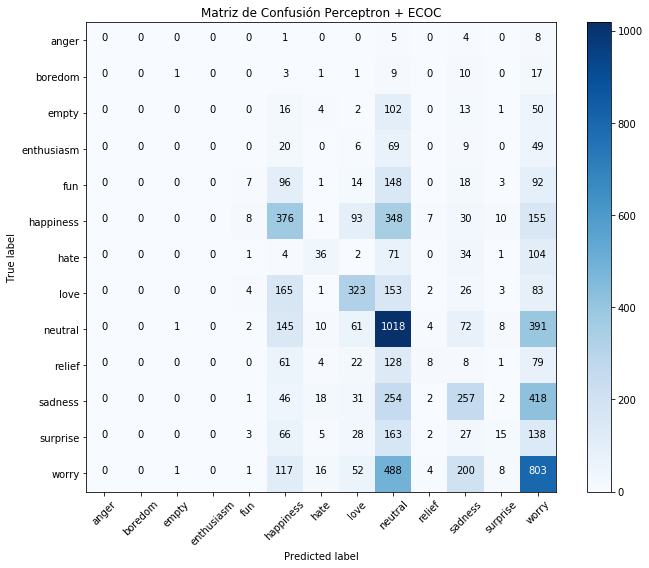

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_trans = TfidfTransformer(use_idf=False)

features_train_tf = tf_trans.fit_transform(features_train)
features_test_tf = tf_trans.fit_transform(features_test)

ovr_LogR.fit(features_train_tf,labels_train)

y_tfidf=ovr_LogR.predict(features_test_tf)

accuracy_score(labels_test, y_tfidf, normalize=True, sample_weight=None) 

plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_matrix(labels_test, y_tfidf, sample_weight=None),np.unique(ovr_LogR.classes_), 
                      title="Matriz de Confusión Perceptron + ECOC")
plt.show()